In [29]:

import os
import sys
src_path = sys.path[0].replace("figures", "src")
# data_path = sys.path[0].replace("notebooks", "data")
if src_path not in sys.path:
    sys.path.append(src_path)

out_path = sys.path[0].replace("figures", "output")

import warnings
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

from profile_extraction import ProfileExtraction
from data_loader import UCSD_dataloader
from utils.plot_utils import *
customize_plt() # customize plt configs, see plot_utils

exp_suffix = "thesis_topic2"
exp_folder = os.path.join(out_path, "experiments", exp_suffix)
if not os.path.exists(exp_folder):
    os.makedirs(exp_folder)
assert os.path.exists(exp_folder)

In [31]:
exp_folder=r"L:\Coding_project\Energy_grid_new_exp_local\thesis_topic2"

In [12]:
keys = ["load_pv", "load_bld", "bat_p", "ev_p", "p_grid"]
colors = {"load_pv":"rebeccapurple","load_bld":"chocolate","p_grid":"royalblue",
          "bat_p":"darkgreen","ev_p":"darkorange","cost":"firebrick",
        "gg":"seagreen", "gge":"seagreen", "pp":"royalblue", "nn":"plum",
          "msc":"firebrick", "tou":"sandybrown"}
names = {"load_pv":"PV","load_bld":"Building","p_grid":"Grid",
          "bat_p":"Battery","ev_p":"EV","cost":"Cost",
        "gg":"MPC-GG", "gge":"MPC-GGE", "pp":"MPC-PP", "nn":"MPC-NN",
          "msc":"MSC", "tou":"TOU"}

In [30]:
log_fn = "6h-bat-6months-disturbance-type.xlsx"
log_df = pd.read_excel(os.path.join(exp_folder, log_fn), index_col=0)
exp_name = "6h-bat-6months-disturbance-type"
log_df.head(50)

,status,bld,pv,ev,method,strategy,B_kWh,pred_model,deg_model_opt,deg_model,...,grid_export,import_cost,export_revenue,grid_max,bat_e_terminal,bat_e_terminal_revenue,load_bld_error_max_neg,load_bld_error_max_pos,load_pv_error_max_neg,load_pv_error_max_pos
id,,,,,,,,,,,,,,,,,,,,,
1,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,unconscious,unconscious,...,28.049589,201.414735,4.333638,168.111879,3.552714e-15,6.023539e-16,-0.366729,0.394998,0.0,0.0
2,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,unconscious,unconscious,...,29.600412,200.575760,4.524275,171.083608,0.000000e+00,0.000000e+00,-1.992911,2.196208,0.0,0.0
3,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,unconscious,unconscious,...,31.528674,200.740953,4.752568,173.558516,0.000000e+00,0.000000e+00,-3.877488,4.671116,0.0,0.0
4,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,unconscious,unconscious,...,36.227223,199.273641,5.301809,286.961483,0.000000e+00,0.000000e+00,-7.762232,8.904694,0.0,0.0
5,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,unconscious,unconscious,...,39.637257,202.291269,5.773480,181.285428,0.000000e+00,0.000000e+00,-10.936145,12.398028,0.0,0.0
6,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,unconscious,unconscious,...,43.476701,202.999664,6.223994,185.833609,0.000000e+00,0.000000e+00,-14.600545,16.946209,0.0,0.0
7,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,unconscious,unconscious,...,50.094483,201.164755,6.982037,303.566748,0.000000e+00,0.000000e+00,-17.244069,22.087748,0.0,0.0
8,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,unconscious,unconscious,...,50.798635,204.648758,7.182883,196.914095,0.000000e+00,0.000000e+00,-22.003711,28.026695,0.0,0.0
9,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,unconscious,unconscious,...,54.357036,205.331414,7.539787,193.271260,0.000000e+00,0.000000e+00,-27.900748,31.308085,0.0,0.0


# PLOT FUNCTION

In [14]:
def get_trial_res(idx_mpc, idx_gt):
    mpc_fn = log_df.loc[idx_mpc, "save_fn"]
    print(mpc_fn)
    gt_fn  = log_df.loc[idx_gt, "save_fn"]
    print(gt_fn)
    mpc_df = pd.read_excel(os.path.join(exp_folder, exp_name, mpc_fn), sheet_name=None, index_col=0) #read all the sheets
    gt_df = pd.read_excel(os.path.join(exp_folder, exp_name, gt_fn), sheet_name="op_log", index_col=0)
    return mpc_df, gt_df


def draw_load_curve(mpc_df, gt_df, key, t0=datetime(2019,10,1,0,0), pred_t=0, gif=False, ax=None):

    ax = plt.gca() if ax is None else ax

    K, delta, exe_K = 96, 0.25, 4

    ts = pd.date_range(t0, t0+timedelta(hours=24), freq=f"{delta}H", inclusive="left")
    # L? why the freq here is delta*exe_k
    ts_exe = pd.date_range(t0, t0+timedelta(hours=24), freq=f"{delta*exe_K}H", inclusive="left")

    y_gt = gt_df.loc[ts, key].values
    
    if key in ["load_bld", "load_pv"]:
        # get values of steps(exe_K) according to ts_exe then reshape it into an 1D vector 
        y_mpc = mpc_df[f"pred_{key}"].loc[ts_exe, range(exe_K)].values.reshape(-1,)
    else:
        y_mpc = mpc_df["op_log"].loc[ts, key].values

    if key in ["load_bld", "load_pv","p_grid",'bat_p',"ev_p"]:
        y_pred = mpc_df[f"pred_{key}"].loc[
            t0+timedelta(hours=pred_t), range(K - int(pred_t/delta))].values
        print(type(y_pred))
        
    if key in ["latest_p_grid_max"]:
        y_pred_temp= list(mpc_df["pred_p_grid"].iloc[0].values)
        
        y_pred_=y_pred_temp.copy()
        for i in range(len(y_pred_temp)):
            y_pred_[i]=max(y_pred_temp[:i+1])
        y_pred=np.array(y_pred_)
        
    # if key == "load_pv":
    #     y_gt *= -1
    #     y_mpc *= -1
    #     y_pred *= -1

    x = np.arange(0, K*delta, delta)
    x_pred = np.arange(pred_t, K*delta, delta)

    c = colors[key]

    if gif:
        exe_steps = int(pred_t/delta)+1

        ax.fill_between(x[:exe_steps], y_gt[:exe_steps], y_mpc[:exe_steps], color=c, alpha=0.2, edgecolor="none", zorder=200)
        ax.fill_between(x_pred, y_gt[exe_steps-1:], y_pred, color=c, alpha=0.6, edgecolor="none", zorder=200)
        ax.plot(x[:exe_steps], y_mpc[:exe_steps], color=c)
        if key in ["load_bld", "load_pv","p_grid",'bat_p',"ev_p"]:
            ax.plot(x_pred, y_pred, color=c, alpha=0.8, lw=2, ls=(0,(1,1)), zorder=-100)
    else:
        ax.fill_between(x, y_gt, y_mpc, color=colors[key], edgecolor="none", alpha=0.3, zorder=-200)
        ax.plot(x, y_mpc, c=colors[key],lw=1)
        if key in ["load_bld", "load_pv","p_grid",'bat_p',"ev_p","latest_p_grid_max"]:
            ax.plot(x_pred, y_pred, color=colors[key], lw=2, zorder=-100)
        
"""      
def draw_load_curve(mpc_df, gt_df, key, t0=datetime(2019,10,1,0,0), pred_t=0, gif=False, ax=None):

    ax = plt.gca() if ax is None else ax

    K, delta, exe_K = 96, 0.25, 4

    ts = pd.date_range(t0, t0+timedelta(hours=24), freq=f"{delta}H", inclusive="left")
    # L? why the freq here is delta*exe_k
    ts_exe = pd.date_range(t0, t0+timedelta(hours=24), freq=f"{delta*exe_K}H", inclusive="left")

    y_gt = gt_df.loc[ts, key].values
    
    ''' 
    if key in ["load_bld", "load_pv"]:
        # get values of steps(exe_K) according to ts_exe then reshape it into an 1D vector 
        y_mpc = mpc_df[f"pred_{key}"].loc[ts_exe, range(exe_K)].values.reshape(-1,)
    else:
        y_mpc = mpc_df["op_log"].loc[ts, key].values
    '''
    y_mpc = mpc_df["op_log"].loc[ts, key].values

    y_pred = mpc_df[f"pred_{key}"].loc[t0+timedelta(hours=pred_t), range(K - int(pred_t/delta))].values

    # if key == "load_pv":
    #     y_gt *= -1
    #     y_mpc *= -1
    #     y_pred *= -1

    x = np.arange(0, K*delta, delta)
    x_pred = np.arange(pred_t, K*delta, delta)

    c = colors[key]

    if gif:
        exe_steps = int(pred_t/delta)+1

        ax.fill_between(x[:exe_steps], y_gt[:exe_steps], y_mpc[:exe_steps], color=c, alpha=0.2, edgecolor="none", zorder=200)
        #ax.fill_between(x_pred, y_gt[exe_steps-1:], y_pred, color=c, alpha=0.6, edgecolor="none", zorder=200)
        ax.plot(x[:exe_steps], y_mpc[:exe_steps], color=c)
        ax.grid(axis='x',color='lightgray',linestyle="--")
        #ax.plot(x_pred, y_pred, color=c, alpha=0.8, lw=1.5, ls="dashed", zorder=-100)
    else:
        ax.fill_between(x, y_gt, y_mpc, color=colors[key], edgecolor="none", alpha=0.3, zorder=-200)
        ax.plot(x, y_mpc, c=colors[key])
        ax.grid(axis='x',color='lightgray',linestyle="--")
        #ax.plot(x_pred, y_pred, color=colors[key], lw=1, ls="dashed", zorder=-100)
"""
               
def text_with_ratio(text, x_ratio, y_ratio, ax, **kw):
    x_lo, x_hi = ax.get_xlim()
    y_lo, y_hi = ax.get_ylim()
    x = x_lo + x_ratio * (x_hi - x_lo)
    y = y_lo + y_ratio * (y_hi - y_lo)
    ax.text(x, y, text, **kw)
     
def draw_load_breakdown(mpc_df, gt_df, gif=False, pred_t=0):
    fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12, 7), gridspec_kw={"width_ratios":[1,1,1.5]})
    gs = axs[0,2].get_gridspec()
    # remove the underlying axes
    for ax in axs[:, -1]:
        ax.remove()
    axbig = fig.add_subplot(gs[:, -1])

    for i in range(4):
        key = keys[i]
        ax = axs[i//2, i%2]
        draw_load_curve(mpc_df, gt_df, key, t0=datetime(2019,10,1,0,0), pred_t=pred_t, gif=gif, ax=ax)
        
        if i//2 == 0:
            ax.set_ylim(-5, 125)
        else:
            ax.set_ylim(-125, 155)
        ax.set_xticks(np.arange(0, 25, 6))
        if i//2 == 0:
            ax.set_xticklabels([])
            ax.tick_params(direction='in', axis="x")
        if i%2 == 1:
            ax.set_yticklabels([])
            ax.tick_params(direction='in', axis="y")
        
        text_with_ratio(names[key], 0.05, 0.88, ax, ha="left", va="bottom", fontsize=18, color=colors[key])
        
    ax = axbig
    key = "p_grid"
    draw_load_curve(mpc_df, gt_df, key, t0=datetime(2019,10,1,0,0), pred_t=pred_t, gif=gif, ax=ax)
    ax.set_xticks(np.arange(0, 25, 6))

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax.set_ylim(-105, 155)
    ax.set_xlim(-0.5, 24.5)

    text_with_ratio(names[key], 0.05, 0.93, ax, ha="left", va="bottom", fontsize=20, color=colors[key])

    # legend
    ax.fill_between([-100,-100], [0,0], [0,0], color="dimgrey", edgecolor="none", alpha=0.3, label="discr. w/ GT")
    ax.plot([-100,-100], [0,0], c="dimgrey", label="Operate")
    ax.plot([-100,-100], [0,0], c="dimgrey", lw=1, ls="dashed", zorder=-100, label="Schedule")

    ax.legend(loc="lower left", fontsize=16, labelcolor="dimgrey", handlelength=2)
    text_with_ratio("1 Oct, 2019", 0.7, 0.03, ax, ha="left", va="bottom", fontsize=14, color="dimgrey")

    if gif:
        text_with_ratio("{:02}:00".format(pred_t), 0.7, 0.10, ax, ha="left", va="bottom", fontsize=22, color="dimgrey")

    plt.tight_layout()

    return fig, axs

In [15]:
##origin version from JuYi
#5: MPC_pred_model-Simple_deg_model_opt-rainflow_p_grid_max-2_price_dc-0.3_price_sell-0.8_ev_charge_rule-flex_strategy-optimal_B_kWh-350_deg_model-DOD_start-10-1_end-10-8.xlsx
#6: MPC_pred_model-GT_deg_model_opt-rainflow_p_grid_max-2_price_dc-0.3_price_sell-0.8_ev_charge_rule-flex_strategy-optimal_B_kWh-350_deg_model-DOD_start-10-1_end-10-8.xlsx
#7: MPC_pred_model-Simple_deg_model_opt-unconscious_p_grid_max-2_price_dc-0.3_price_sell-0.8_ev_charge_rule-flex_strategy-optimal_B_kWh-350_deg_model-DOD_start-10-1_end-10-8.xlsx

#mpc_df, gt_df = get_trial_res(5,6)
#mpc_df_UC, _ = get_trial_res(7, 6)
#gt_tou,gt_df=get_trial_res(5,6)
#msc_simple_uc,tou_simple_uc=get_trial_res(10,11)
#tou_gt_uc,msc_simple_rf=get_trial_res(12,13)

In [16]:
gif_folder = os.path.join(sys.path[0], "MPC_demo_gif")

In [17]:
'''for t in range(24):
    fig = draw_load_breakdown(tou_gt_uc, gt_df, gif=True, pred_t=t)
    save_fn = os.path.join(gif_folder, f"526-fig1-MSC_demo_tou_gt&mpc_gt_gif-{t}.png")
    plt.savefig(save_fn, dpi=120, facecolor="w", bbox_inches="tight")'''

'for t in range(24):\n    fig = draw_load_breakdown(tou_gt_uc, gt_df, gif=True, pred_t=t)\n    save_fn = os.path.join(gif_folder, f"526-fig1-MSC_demo_tou_gt&mpc_gt_gif-{t}.png")\n    plt.savefig(save_fn, dpi=120, facecolor="w", bbox_inches="tight")'

In [18]:
'''
import imageio

frames=[]
for filename in [os.path.join(gif_folder, f"214-fig3-MPC_demo_gif-{t}.png")
                     for t in range(24)]:
    image = imageio.imread(filename)
    frames.append(image)
gif_fn = "214-MPC_demo-gif-rainflow.gif"
imageio.mimsave(gif_fn, frames, format='GIF', duration=0.3)'''

'\nimport imageio\n\nframes=[]\nfor filename in [os.path.join(gif_folder, f"214-fig3-MPC_demo_gif-{t}.png")\n                     for t in range(24)]:\n    image = imageio.imread(filename)\n    frames.append(image)\ngif_fn = "214-MPC_demo-gif-rainflow.gif"\nimageio.mimsave(gif_fn, frames, format=\'GIF\', duration=0.3)'

In [19]:
keys = ["load_pv", "load_bld", "bat_p","p_grid","latest_p_grid_max","tou_import", "ev_p" ]
colors = {"load_pv":"rebeccapurple","load_bld":"chocolate","p_grid":"royalblue",
          "bat_p":"darkgreen","ev_p":"darkorange","cost":"firebrick",
        "gg":"seagreen", "gge":"seagreen", "pp":"royalblue", "nn":"plum",
          "msc":"firebrick", "tou_import":"sandybrown","latest_p_grid_max":"orangered"}
names = {"load_pv":"PV","load_bld":"Building","p_grid":"Grid",
          "bat_p":"Battery","ev_p":"EV","cost":"Cost",
        "gg":"MPC-GG", "gge":"MPC-GGE", "pp":"MPC-PP", "nn":"MPC-NN",
          "msc":"MSC", "tou_import":"Price_buy","latest_p_grid_max":"Grid_max"}

def compare_tight_old(left,base_left,right,base_right,param_left,param_right,keys=None,
                        save_fn=None, gif = False, pred_t = 0, y_lims=None, title=None,start_t=None,strat_t_title=None):
    dc_price=float(float(left['summary'].loc["demand_charge"]["All"]/left['summary'].loc["grid_max"]["All"]))
    overall={
        "OPEX_left": int(left['summary'].loc["OPEX"]["All"]),
        "OPEX_right": int(right['summary'].loc["OPEX"]["All"]),
        "Grid_left": int(left['summary'].loc["grid_max"]["All"]),
        "Grid_right": int(right['summary'].loc["grid_max"]["All"]),
        "tou_left": int(left['summary'].loc["tou_cost"]["All"]),
        "tou_right": int(right['summary'].loc["tou_cost"]["All"])  ,
        "dc_left": int(left['summary'].loc["demand_charge"]["All"]),
        "dc_right": int(right['summary'].loc["demand_charge"]["All"]),
        "ev_left": int(left['summary'].loc["ev_I"]["All"]),
        "ev_right": int(right['summary'].loc["ev_I"]["All"])
    }
    '''
    tou_left=0
    for i in range(len(left['pred_p_grid'].iloc[0].values)):
        
        p=left['pred_p_grid'].iloc[0].values[i]
        if p>=0:
            tou_left+=p*left['op_log']["tou_import"][i]*0.25
        else:
            tou_left+=p*left['op_log']["tou_import"][i]*0.6*0.25
    '''
    tou_left=int(left['summary_one_step'].loc["tou_cost"]["All"])
    dc_left=max(left['pred_p_grid'].iloc[0].values)*dc_price  
    one_step={
        "OPEX_left": int(dc_left+tou_left),
        #"OPEX_right": int(right['summary_one_step'].loc["OPEX"]["All"]),
        "Grid_left": int(max(left['pred_p_grid'].iloc[0].values)),
        #"Grid_right": int(max(right['pred_p_grid'].iloc[0].values)),
        #"Grid_right": int(right['summary_one_step'].loc["grid_max"]["All"]),
        "tou_left": int(tou_left),
        #"tou_right": int(right['summary_one_step'].loc["tou_cost"]["All"])  ,
        "dc_left": int(dc_left),
        #"dc_right": int(max(right['pred_p_grid'].iloc[0].values)*dc_price),
        #"dc_left": int(left['summary_one_step'].loc["demand_charge"]["All"]),
        #"dc_right": int(right['summary_one_step'].loc["demand_charge"]["All"]),
        "ev_left": int(left['summary_one_step'].loc["ev_I"]["All"]),
        #"ev_right": int(right['summary_one_step'].loc["ev_I"]["All"])
    }

    
    if save_fn is None: 
        raise ValueError("filename not assigned")
    if y_lims is None:
        y_lims = {
            "bat_p": (-120,145),
            "ev_p": (-5, 145),
            "p_grid": (-90, 180),
            "load_pv": (-5,200),
            "load_bld": (-5,200),
            "tou_import":(-0.1,0.3),
            "latest_p_grid_max":(-90, 180)
        }

    fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(9, 16))
    for i in range(2):
        key = keys[i]
        ax = axs[0, i]
        draw_load_curve(left, base_left, key, t0=start_t, pred_t=pred_t, gif=gif, ax=ax)
        y_lo, y_hi = y_lims[key]
        ax.set_ylim(y_lo, y_hi)
        text_with_ratio(names[key], 0.05, 0.85, ax, ha="left", va="bottom", fontsize=18, color=colors[key])


    for i in range(10):
        ax = axs[i//2+1, i%2]
        if i%2 == 0:
            df, base= left, base_left  
        else:
            df, base=right, base_right
        key = keys[i//2+2]
        draw_load_curve(df, base, key, t0=start_t, pred_t=pred_t, gif=gif, ax=ax)
        y_lo, y_hi = y_lims[key]
        ax.set_ylim(y_lo, y_hi)

        if i%2 == 0:
            text_with_ratio(names[key], 0.05, 0.85, ax, ha="left", va="bottom", fontsize=18, color=colors[key])
        if names[key]=='Grid':
            if i%2==0:
                text_with_ratio("overall-max-"+str(overall["Grid_left"])+"kW", 0.9, 0.85, ax, ha="right", va="bottom", fontsize=12, color=colors[key])
                text_with_ratio("one-step-max-"+str(one_step["Grid_left"])+"kW", 0.9, 0.75, ax, ha="right", va="bottom", fontsize=12, color=colors[key])
            if i%2==1:
                text_with_ratio("overall-max-"+str(overall["Grid_right"])+"kW", 0.9, 0.85, ax, ha="right", va="bottom", fontsize=12, color=colors[key])
                #text_with_ratio("one-step-max-"+str(one_step["Grid_right"])+"kW", 0.9, 0.75, ax, ha="right", va="bottom", fontsize=12, color=colors[key])
        if names[key]=='Grid_max':
            if i%2==0:
                text_with_ratio(str(overall["dc_left"])+"$/day", 0.9, 0.85, ax, ha="right", va="bottom", fontsize=12, color=colors[key])
                text_with_ratio("one-step"+str(one_step["dc_left"])+"$/day", 0.9, 0.75, ax, ha="right", va="bottom", fontsize=12, color=colors[key])
            if i%2==1:
                text_with_ratio(str(overall["dc_right"])+"$/day", 0.9, 0.85, ax, ha="right", va="bottom", fontsize=12, color=colors[key])               
        if names[key]=='Price_buy':
            if i%2==0:
                text_with_ratio(str(overall["tou_left"])+"$/day", 0.9, 0.85, ax, ha="right", va="bottom", fontsize=12, color=colors[key])
                text_with_ratio("one-step"+str(one_step["tou_left"])+"$/day", 0.9, 0.75, ax, ha="right", va="bottom", fontsize=12, color=colors[key])
            if i%2==1:
                text_with_ratio(str(overall["tou_right"])+"$/day", 0.9, 0.85, ax, ha="right", va="bottom", fontsize=12, color=colors[key])
        if names[key]=='EV':
            if i%2==0:
                text_with_ratio(str(overall["ev_left"])+"/day", 0.9, 0.85, ax, ha="right", va="bottom", fontsize=12, color=colors[key])
            if i%2==1:
                text_with_ratio(str(overall["ev_right"])+"/day", 0.9, 0.85, ax, ha="right", va="bottom", fontsize=12, color=colors[key])                
                
    for i in range(12):
        ax = axs[i//2, i%2]
        if i//2 < 5:
            ax.set_xticklabels([])
            ax.tick_params(direction='in', axis="x")
        
        ax.set_xlim(-0.5, 24.5)
        ax.set_xticks(np.arange(0, 25, 6))

        if i%2 == 1:
            ax.set_yticklabels([])
            ax.tick_params(direction='in', axis="y")

    for i in range(2):
        ax = axs[5, i]
        xlabel = "{}-opex-{}".format(param_left,one_step["OPEX_left"]) if i == 0 else "{}-opex-{}".format(param_right,overall["OPEX_right"])
        if overall["OPEX_right"]>=one_step["OPEX_left"]:
            ax.set_xlabel("{:^30}".format(xlabel), labelpad=10, backgroundcolor="lightgrey")
        else:
            ax.set_xlabel("{:^30}".format(xlabel), labelpad=10, backgroundcolor="pink")

    # legend
    ax = axs[0,1]
    ax.fill_between([-100,-100], [0,0], [0,0], color="dimgrey", edgecolor="none", alpha=0.3, label="discr. w/ GT")
    ax.plot([-100,-100], [0,0], c="dimgrey", lw=1, label="Operate")
    ax.plot([-100,-100], [0,0], c="dimgrey", lw=2, zorder=-100, label="Schedule")

    ax.legend(loc="lower right", labelcolor="dimgrey", handlelength=2)

    ax = axs[4,1]
    text_with_ratio(strat_t_title, 0.68, 0.03, ax, ha="left", va="bottom", fontsize=10, color="dimgrey")

    # add a title
    fig.suptitle(title, fontsize=12, y=0.00)

    plt.tight_layout(w_pad=0.1, h_pad=0.1)
    plt.savefig(save_fn)

def compare_tight(key_base, key_left, key_right, keys=None,y_lims=None,
                  save_fn=None, gif = False, pred_t = 0, log_df=None, prefix='Fig',format='png'):
    
    if any(type(i) != dict for i in [key_base, key_left, key_right]):
    # 如果有一个或多个键不是字典类型，则抛出异常
        raise ValueError('Keys must be dictionaries')
    
    if save_fn is None:
        save_fn=prefix
        for k in key_base.keys():
            save_fn += "_{}-{}".format(k,key_base[k])
        for k in key_left.keys():
            save_fn += "_{}-{}&{}".format(k,key_left[k],key_right[k])
        save_fn += ".{}".format(format)
    
    def save_fn_match(key_dic_base, key_dic_altered, df, gt=False):
        if gt==False:
            match_series = pd.Series({**key_dic_base, **key_dic_altered})
        else:
            match_series = pd.Series({**key_dic_base, **key_dic_altered, 
                                      **{'method': 'MPC', 'strategy': 'optimal','pred_model':'GT'}})

        matches = df.loc[(df[list(match_series.keys())] == match_series).all(axis=1)]
        if matches.shape[0] != 1:
            raise Exception("duplicated exps as:{}".format(matches))
        else: 
            return matches.index[0]

    base_left_id=save_fn_match(key_base,key_left,log_df,True)
    left_id=save_fn_match(key_base,key_left,log_df,False)
    base_right_id=save_fn_match(key_base,key_right,log_df,True)
    right_id=save_fn_match(key_base,key_right,log_df,False)
    '''
    base_left, left=get_trial_res(base_left_id,left_id)
    base_right, right=get_trial_res(base_right_id,right_id)
    '''
    left,base_left=get_trial_res(left_id,base_left_id)
    right,base_right=get_trial_res(right_id,base_right_id)

    if y_lims is None:
        y_lims = {
            "bat_p": (-120,145),
            "ev_p": (-5, 145),
            "p_grid": (-90, 180),
            "load_pv": (-5,200),
            "load_bld": (-5,200),
        }

    fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(7, 11))
    for i in range(2):
        key = keys[i]
        ax = axs[0, i]
        draw_load_curve(left, base_left, key, t0=datetime(2019,10,1,0,0), pred_t=pred_t, gif=gif, ax=ax)
        y_lo, y_hi = y_lims[key]
        ax.set_ylim(y_lo, y_hi)
        text_with_ratio(names[key], 0.05, 0.85, ax, ha="left", va="bottom", fontsize=18, color=colors[key])


    for i in range(6):
        ax = axs[i//2+1, i%2]
        if i%2 == 0:
            df, base= left, base_left  
        else:
            df, base=right, base_right
        key = keys[i//2+2]
        draw_load_curve(df, base, key, t0=datetime(2019,10,1,0,0), pred_t=pred_t, gif=gif, ax=ax)
        y_lo, y_hi = y_lims[key]
        ax.set_ylim(y_lo, y_hi)

        if i%2 == 0:
            text_with_ratio(names[key], 0.05, 0.85, ax, ha="left", va="bottom", fontsize=18, color=colors[key])

    for i in range(8):
        ax = axs[i//2, i%2]
        if i//2 < 3:
            ax.set_xticklabels([])
            ax.tick_params(direction='in', axis="x")
        
        ax.set_xlim(-0.5, 24.5)
        ax.set_xticks(np.arange(0, 25, 6))

        if i%2 == 1:
            ax.set_yticklabels([])
            ax.tick_params(direction='in', axis="y")
    

    #subtitle
    for i in range(2):
        ax = axs[3, i]
        xlabel = "{}".format(next(iter(key_left.items()))[1]) if i == 0 else "{}".format(next(iter(key_right.items()))[1])
        ax.set_xlabel("{:^30}".format(xlabel), labelpad=10, backgroundcolor="lightgrey")

    #to be completed
    # comparison
    #ax= axs[4,0]
    def tco_compare(ax):
        data = [{'mpc_nn': 1, 'mpc_gt': 0.85},
            {'mpc_nn': 1, 'mpc_gt': 0.95},
            {'mpc_nn': 1, 'mpc_gt': 0.91}]
        # 计算最大值
        max_val = max([max(d['mpc_nn'], d['mpc_gt']) for d in data])
        # 绘制条形图
        ax = plt.subplot(1, 1, 1)
        for i, d in enumerate(data):
            mpc_nn = d['mpc_nn']
            mpc_gt = d['mpc_gt']  
            y_pos = [i, i]
            ax.barh(y_pos, [mpc_nn, mpc_gt], height=0.2, color=['teal', 'aquamarine'])
            ax.set_yticks(range(len(data)))
            ax.set_yticklabels([f'data {i + 1}' for i in range(len(data))])
            ax.set_xlim([0, max_val])
    
    #tco_compare(axs[4,0])
    #tco_compare(axs[4,1])
    # legend
    ax = axs[0,1]
    ax.fill_between([-100,-100], [0,0], [0,0], color="dimgrey", edgecolor="none", alpha=0.3, label="discr. w/ GT")
    ax.plot([-100,-100], [0,0], c="dimgrey", label="Operate")
    ax.plot([-100,-100], [0,0], c="dimgrey", lw=1, ls="dashed", zorder=-100, label="Schedule")

    ax.legend(loc="lower right", labelcolor="dimgrey", handlelength=2)

    ax = axs[3,1]
    text_with_ratio("1 Oct, 2019", 0.68, 0.03, ax, ha="left", va="bottom", fontsize=10, color="dimgrey")

    # add a title
    title=''
    for k in key_base.keys():
        title += " {}-{}".format(k,key_base[k])
    fig.suptitle(title, fontsize=12, y=0.00)

    plt.tight_layout(w_pad=0.1, h_pad=0.1)
    plt.savefig(save_fn)
    
# plt.savefig("214-fig3-MPC_RF-UC.png", dpi=300, facecolor="w", bbox_inches="tight")


#mpc_df, gt_df = get_trial_res(5,6)
#mpc_df_UC, _ = get_trial_res(7,6)

#compare_tight(gt_df,mpc_df,mpc_df_UC,"OPT","rainflow","unconscious","Gilman_Gilman_OSLER_OPT_UC&df.png",False,0)



# thesis topic2 plot

MPC-MPC-optimal-Disturbance-unconscious-1.5-0.6-0.6-flex-438-unconscious-03-01-04-01-Sum-ALL-Sum-normal-0.1-2023-08-28_001.xlsx
MPC-MPC-optimal-GT-unconscious-2.5-0.6-0.6-flex-438-unconscious-03-01-04-01-Sum-ALL-Sum-nan-nan-2023-08-29_001.xlsx
MPC-MPC-optimal-Disturbance-unconscious-1.5-0.6-0.6-flex-438-unconscious-03-01-04-01-Sum-ALL-Sum-uniform_pos-0.1-2023-08-28_001.xlsx
MPC-MPC-optimal-GT-unconscious-2.5-0.6-0.6-flex-438-unconscious-03-01-04-01-Sum-ALL-Sum-nan-nan-2023-08-29_001.xlsx
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


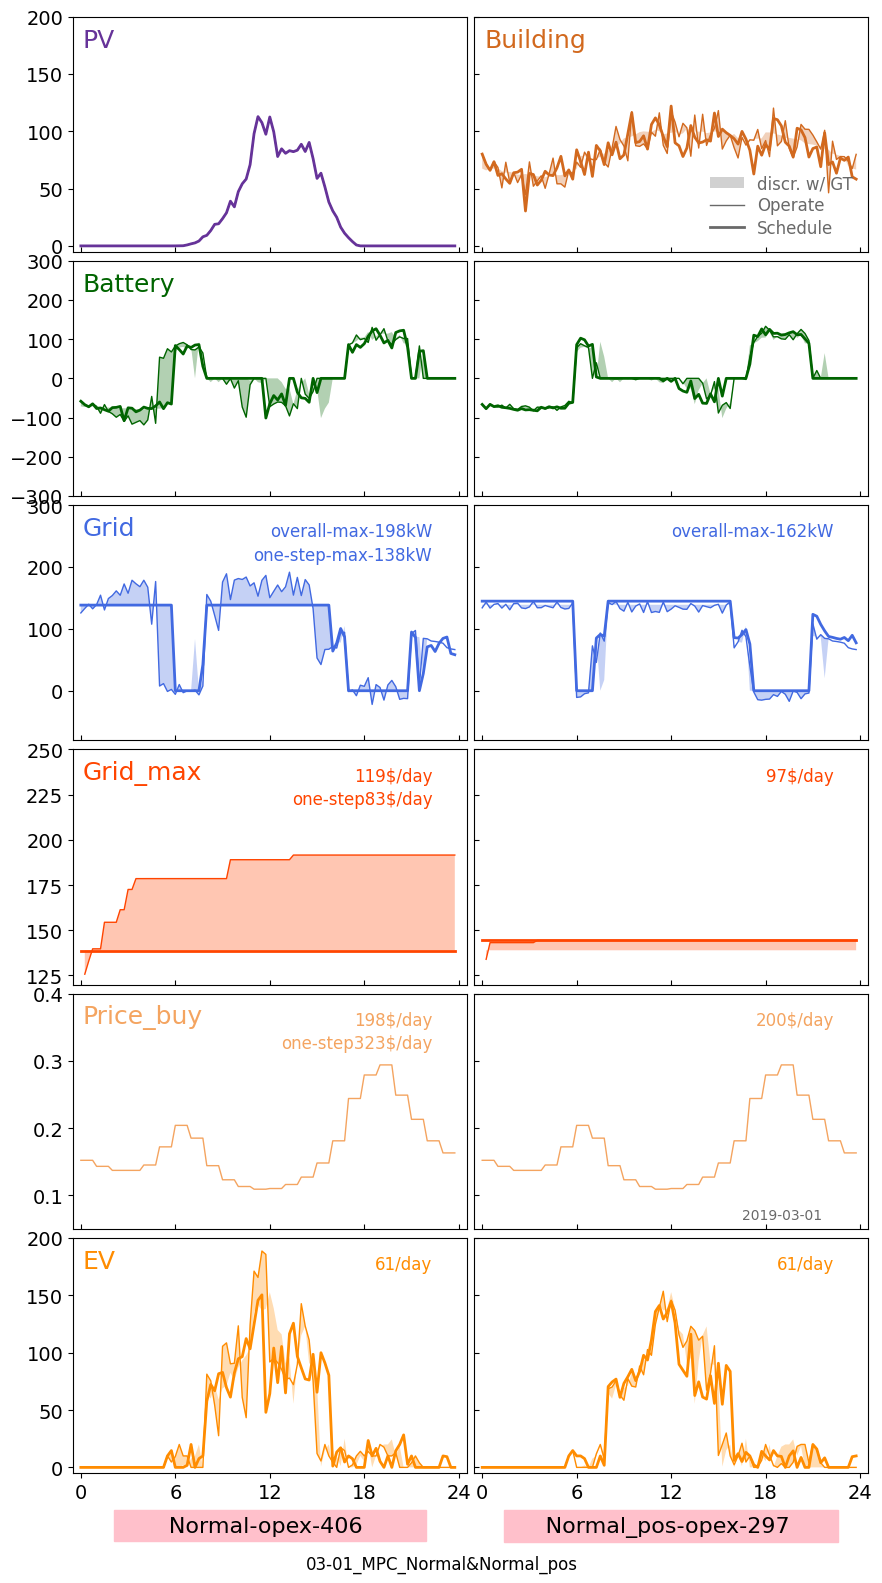

In [33]:
#Mar
base_=2
base=1+4*(base_-1)

mpc,_=get_trial_res(12,127)
msc,_2=get_trial_res(33,127)

compare_tight_old(left=mpc,base_left=_,right=msc,base_right=_2,
                  param_left="Normal",param_right="Normal_pos",keys=keys,
                  save_fn="03-01_MPC_Normal&Normal_pos.png",gif=False,pred_t=0,
                  title="03-01_MPC_Normal&Normal_pos",
                  y_lims = {
                    "bat_p": (-300,300),
                    "ev_p": (-5, 200),
                    "p_grid": (-80,300),
                    "load_pv": (-5,200),
                    "load_bld": (-5,200),
                    "tou_import":(0.05,0.4),
                    "latest_p_grid_max":(120,250)
                },
                    start_t=datetime(2019,3,1,0,0),
                  strat_t_title='2019-03-01')

MPC-MPC-optimal-Disturbance-unconscious-2.5-0.6-0.6-flex-438-unconscious-06-01-07-01-Sum-ALL-Sum-normal-0.1-2023-08-29_001.xlsx
MPC-MPC-optimal-GT-unconscious-2.5-0.6-0.6-flex-438-unconscious-06-01-07-01-Sum-ALL-Sum-nan-nan-2023-08-29_001.xlsx
MPC-MPC-optimal-Disturbance-unconscious-2.5-0.6-0.6-flex-438-unconscious-06-01-07-01-Sum-ALL-Sum-uniform_pos-0.1-2023-08-29_001.xlsx
MPC-MPC-optimal-GT-unconscious-2.5-0.6-0.6-flex-438-unconscious-06-01-07-01-Sum-ALL-Sum-nan-nan-2023-08-29_001.xlsx
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


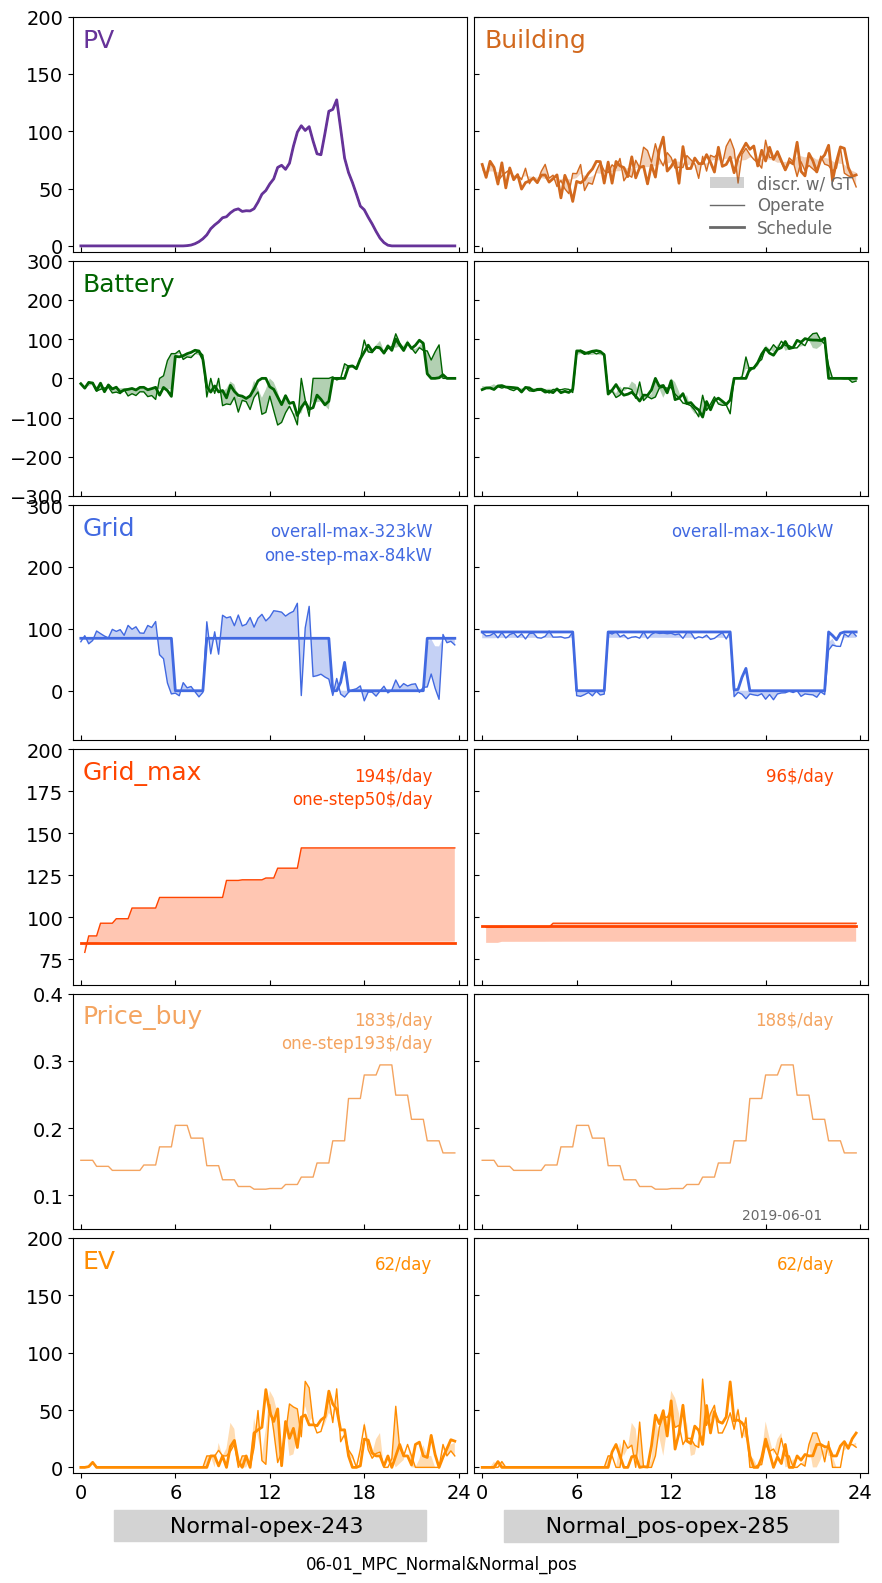

: 

In [38]:
#Feb
base=128

mpc,_=get_trial_res(12+base,127+base)
msc,_2=get_trial_res(33+base,127+base)

compare_tight_old(left=mpc,base_left=_,right=msc,base_right=_2,
                  param_left="Normal",param_right="Normal_pos",keys=keys,
                  save_fn="06-01_MPC_Normal&Normal_pos.png",gif=False,pred_t=0,
                  title="06-01_MPC_Normal&Normal_pos",
                  y_lims = {
                    "bat_p": (-300,300),
                    "ev_p": (-5, 200),
                    "p_grid": (-80,300),
                    "load_pv": (-5,200),
                    "load_bld": (-5,200),
                    "tou_import":(0.05,0.4),
                    "latest_p_grid_max":(60,200)
                },
                    start_t=datetime(2019,6,1,0,0),
                  strat_t_title='2019-06-01')

# plot

MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-1-1-0-0-1-2-0-0-Sum-GILMAN-Sum-step-0-1-2023-08-08_001.xlsx
MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-1-1-0-0-1-2-0-0-Sum-GILMAN-Sum-step-0-1-2023-08-08_001.xlsx
MPC-RBC-MSC-GT-unconscious-1.5-0.6-0.6-unif-438-unconscious-1-1-0-0-1-2-0-0-Sum-GILMAN-Sum-moving-0-1-2023-08-08_001.xlsx
MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-1-1-0-0-1-2-0-0-Sum-GILMAN-Sum-step-0-1-2023-08-08_001.xlsx
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


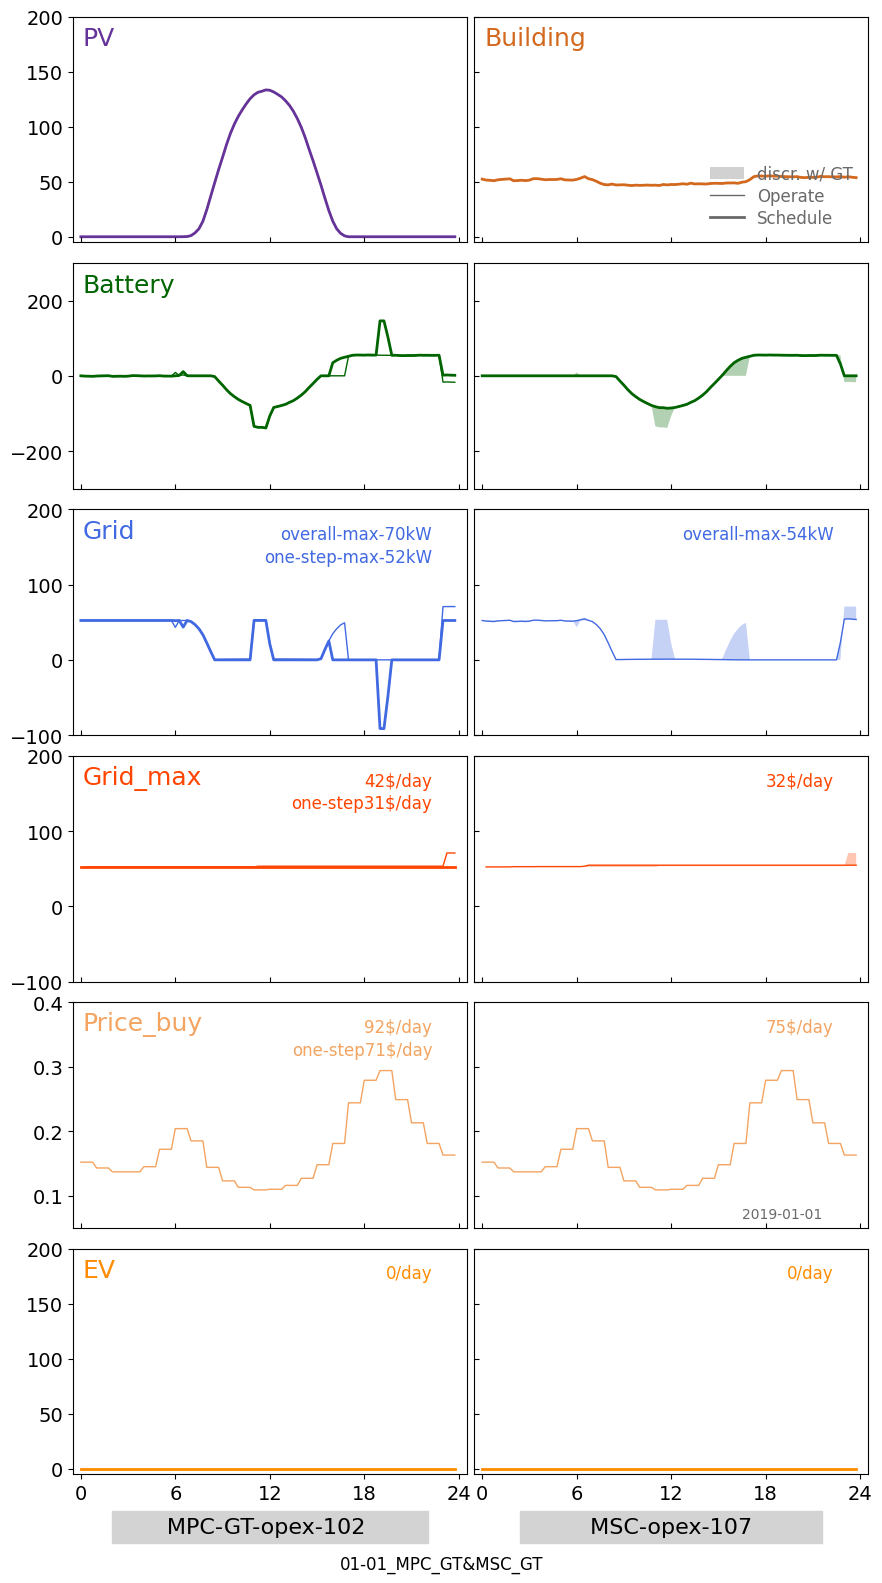

In [122]:
#Jan
base_=1
base=1+4*(base_-1)

mpc,_=get_trial_res(base+3,base+3)
msc,_2=get_trial_res(base,base+3)

compare_tight_old(left=mpc,base_left=_,right=msc,base_right=_2,
                  param_left="MPC-GT",param_right="MSC",keys=keys,
                  save_fn="01-01_MPC_GT&MSC_GT.png",gif=False,pred_t=0,
                  title="01-01_MPC_GT&MSC_GT",
                  y_lims = {
                    "bat_p": (-300,300),
                    "ev_p": (-5, 200),
                    "p_grid": (-100,200),
                    "load_pv": (-5,200),
                    "load_bld": (-5,200),
                    "tou_import":(0.05,0.4),
                    "latest_p_grid_max":(-100,200)
                },
                    start_t=datetime(2019,1,1,0,0),
                  strat_t_title='2019-01-01')

MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-2-1-0-0-2-2-0-0-Sum-GILMAN-Sum-step-0-1-2023-08-08_001.xlsx
MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-2-1-0-0-2-2-0-0-Sum-GILMAN-Sum-step-0-1-2023-08-08_001.xlsx
MPC-RBC-MSC-GT-unconscious-1.5-0.6-0.6-unif-438-unconscious-2-1-0-0-2-2-0-0-Sum-GILMAN-Sum-moving-0-1-2023-08-08_001.xlsx
MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-2-1-0-0-2-2-0-0-Sum-GILMAN-Sum-step-0-1-2023-08-08_001.xlsx
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


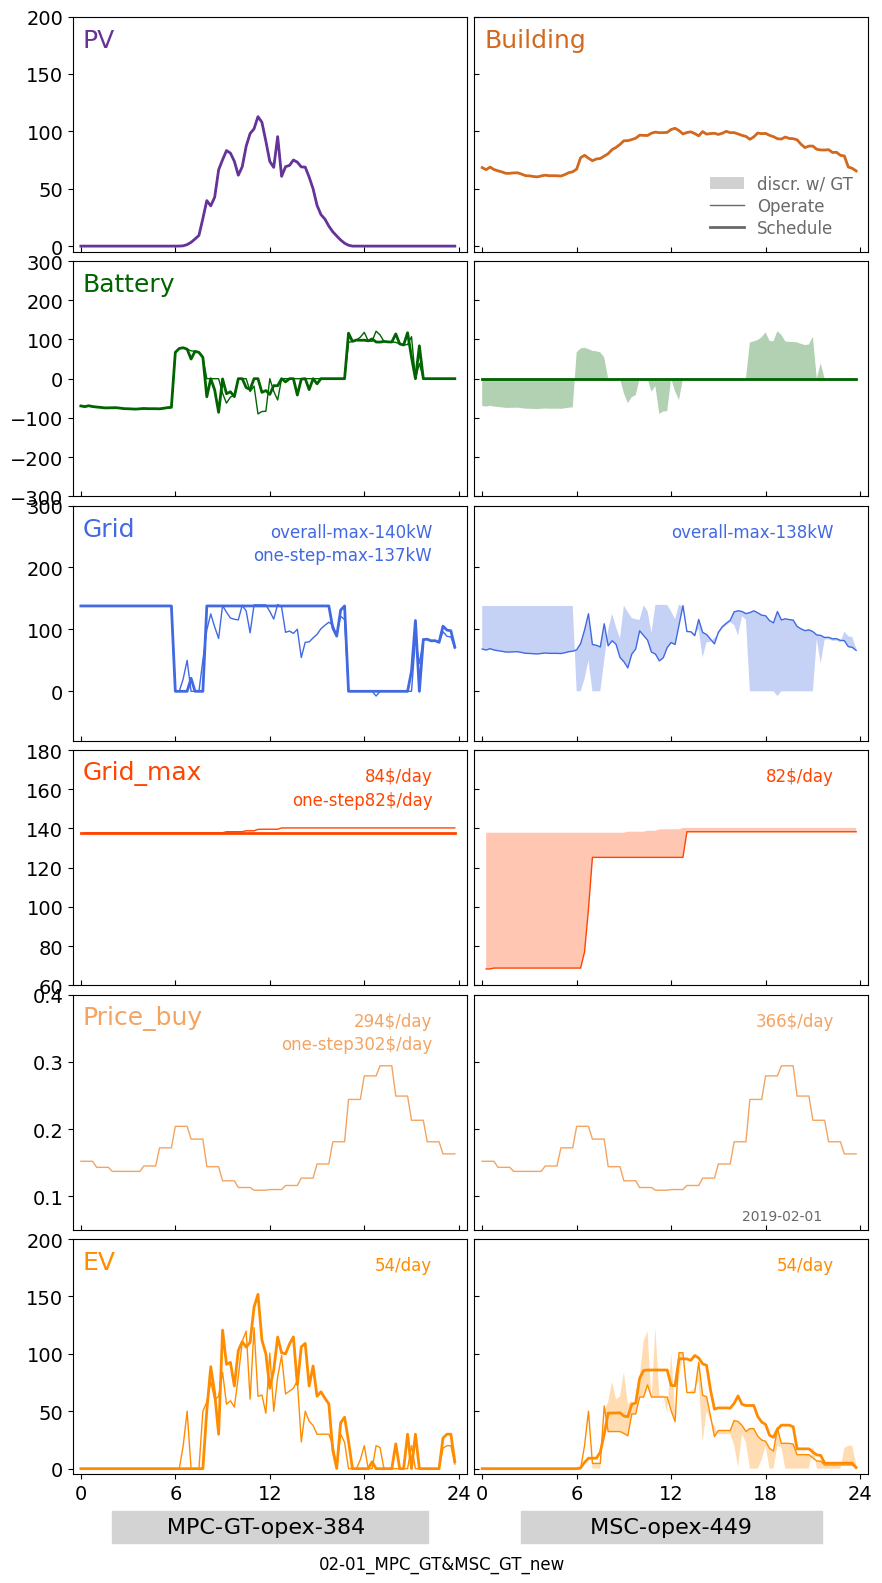

In [111]:
#Feb
base_=2
base=1+4*(base_-1)

mpc,_=get_trial_res(base+3,base+3)
msc,_2=get_trial_res(base,base+3)

compare_tight_old(left=mpc,base_left=_,right=msc,base_right=_2,
                  param_left="MPC-GT",param_right="MSC",keys=keys,
                  save_fn="02-01_MPC_GT&MSC_GT_new.png",gif=False,pred_t=0,
                  title="02-01_MPC_GT&MSC_GT_new",
                  y_lims = {
                    "bat_p": (-300,300),
                    "ev_p": (-5, 200),
                    "p_grid": (-80,300),
                    "load_pv": (-5,200),
                    "load_bld": (-5,200),
                    "tou_import":(0.05,0.4),
                    "latest_p_grid_max":(60,180)
                },
                    start_t=datetime(2019,2,1,0,0),
                  strat_t_title='2019-02-01')

MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-3-1-0-0-3-2-0-0-Sum-GILMAN-Sum-step-0-1-2023-08-08_001.xlsx
MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-3-1-0-0-3-2-0-0-Sum-GILMAN-Sum-step-0-1-2023-08-08_001.xlsx
MPC-RBC-MSC-GT-unconscious-1.5-0.6-0.6-unif-438-unconscious-3-1-0-0-3-2-0-0-Sum-GILMAN-Sum-moving-0-1-2023-08-08_001.xlsx
MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-3-1-0-0-3-2-0-0-Sum-GILMAN-Sum-step-0-1-2023-08-08_001.xlsx
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


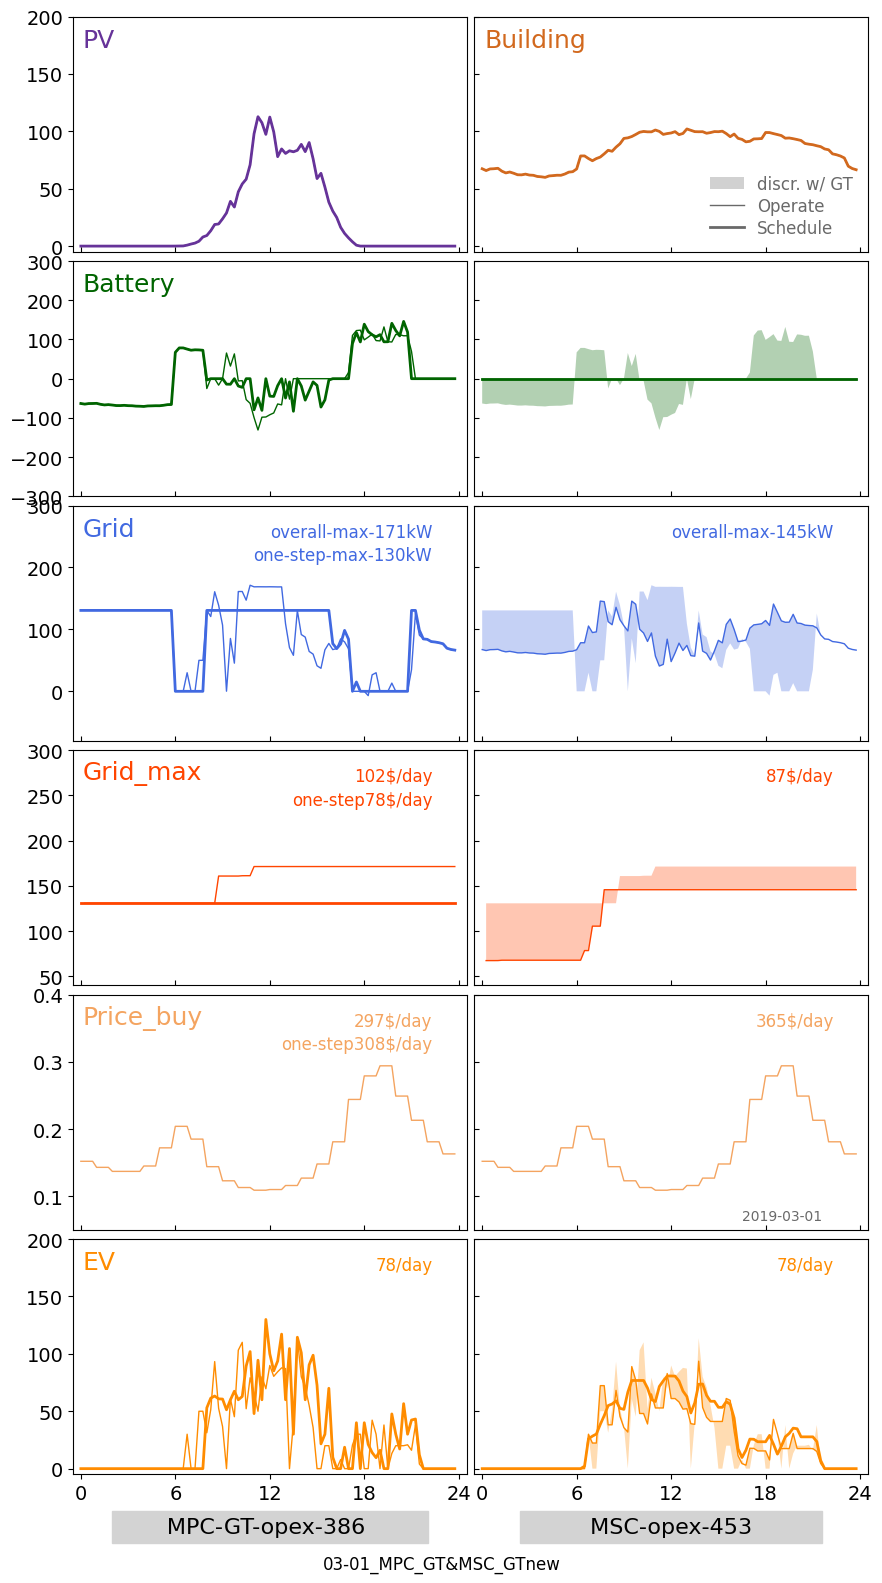

In [113]:
#Mar
base_=3
base=1+4*(base_-1)

mpc,_=get_trial_res(base+3,base+3)
msc,_2=get_trial_res(base,base+3)

compare_tight_old(left=mpc,base_left=_,right=msc,base_right=_2,
                  param_left="MPC-GT",param_right="MSC",keys=keys,
                  save_fn="03-01_MPC_GT&MSC_GTnew.png",gif=False,pred_t=0,
                  title="03-01_MPC_GT&MSC_GTnew",
                  y_lims = {
                    "bat_p": (-300,300),
                    "ev_p": (-5, 200),
                    "p_grid": (-80,300),
                    "load_pv": (-5,200),
                    "load_bld": (-5,200),
                    "tou_import":(0.05,0.4),
                    "latest_p_grid_max":(40,300)
                },
                    start_t=datetime(2019,3,1,0,0),
                  strat_t_title='2019-03-01')

MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-4-1-0-0-4-2-0-0-Sum-GILMAN-Sum-step-0-1-2023-08-08_001.xlsx
MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-4-1-0-0-4-2-0-0-Sum-GILMAN-Sum-step-0-1-2023-08-08_001.xlsx
MPC-RBC-MSC-GT-unconscious-1.5-0.6-0.6-unif-438-unconscious-4-1-0-0-4-2-0-0-Sum-GILMAN-Sum-moving-0-1-2023-08-08_001.xlsx
MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-4-1-0-0-4-2-0-0-Sum-GILMAN-Sum-step-0-1-2023-08-08_001.xlsx
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


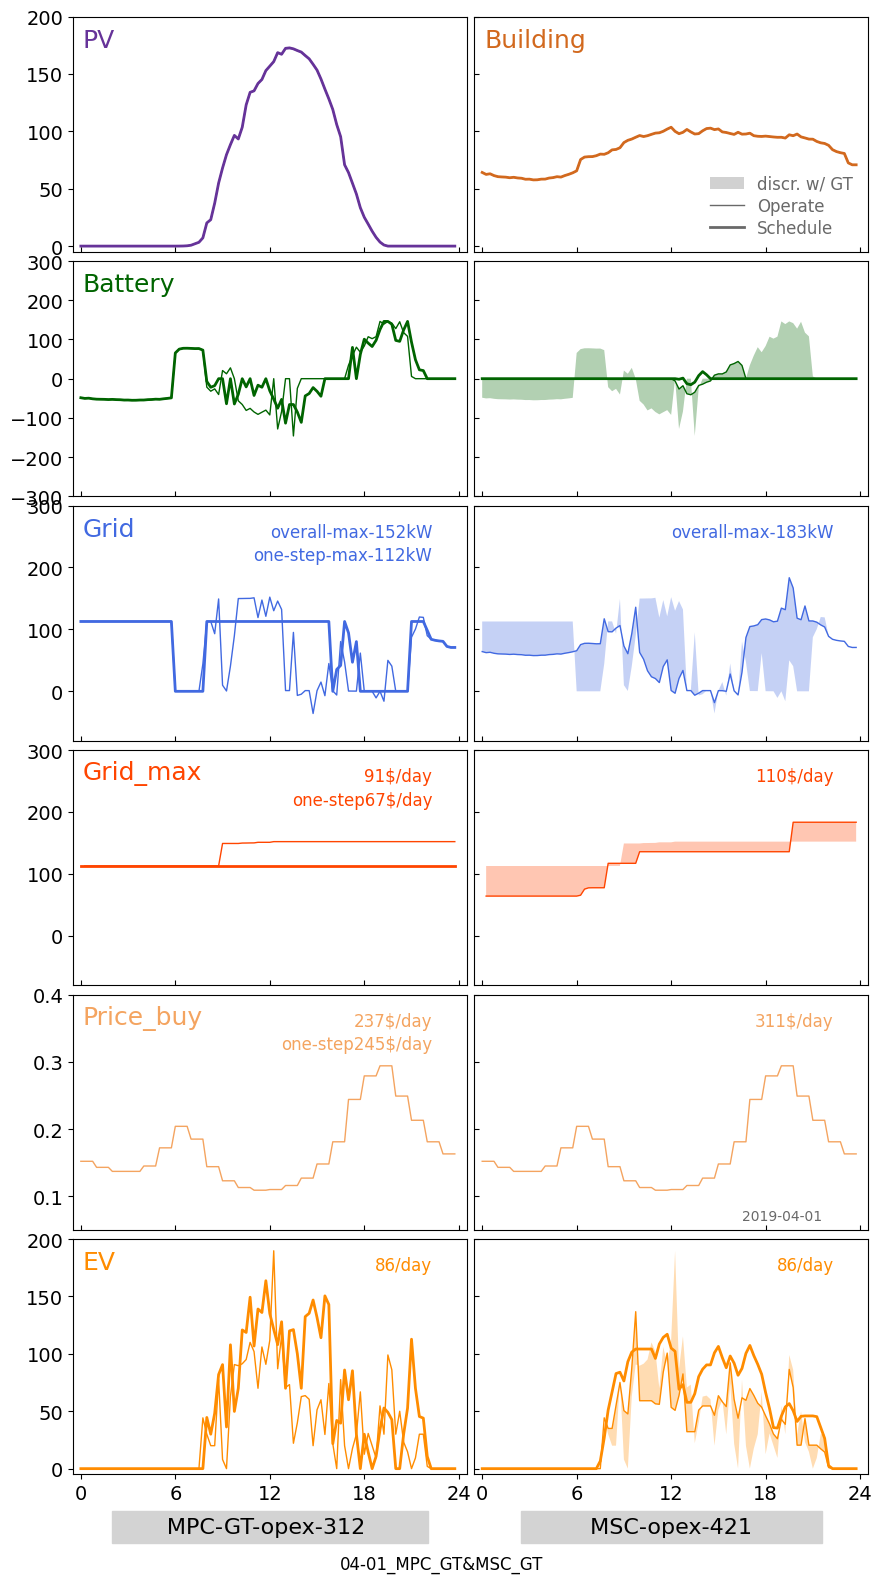

In [115]:
#Apr
base_=4

base=1+4*(base_-1)

mpc,_=get_trial_res(base+3,base+3)
msc,_2=get_trial_res(base,base+3)

compare_tight_old(left=mpc,base_left=_,right=msc,base_right=_2,
                  param_left="MPC-GT",param_right="MSC",keys=keys,
                  save_fn="04-01_MPC_GT&MSC_GTnew.png",gif=False,pred_t=0,
                  title="04-01_MPC_GT&MSC_GT",
                  y_lims = {
                    "bat_p": (-300,300),
                    "ev_p": (-5, 200),
                    "p_grid": (-80,300),
                    "load_pv": (-5,200),
                    "load_bld": (-5,200),
                    "tou_import":(0.05,0.4),
                    "latest_p_grid_max":(-80,300)
                },
                    start_t=datetime(2019,4,1,0,0),
                  strat_t_title='2019-04-01')

MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-5-1-0-0-5-2-0-0-Sum-GILMAN-Sum-step-0-1-2023-08-08_001.xlsx
MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-5-1-0-0-5-2-0-0-Sum-GILMAN-Sum-step-0-1-2023-08-08_001.xlsx
MPC-RBC-MSC-GT-unconscious-1.5-0.6-0.6-unif-438-unconscious-5-1-0-0-5-2-0-0-Sum-GILMAN-Sum-moving-0-1-2023-08-08_002.xlsx
MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-5-1-0-0-5-2-0-0-Sum-GILMAN-Sum-step-0-1-2023-08-08_001.xlsx
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


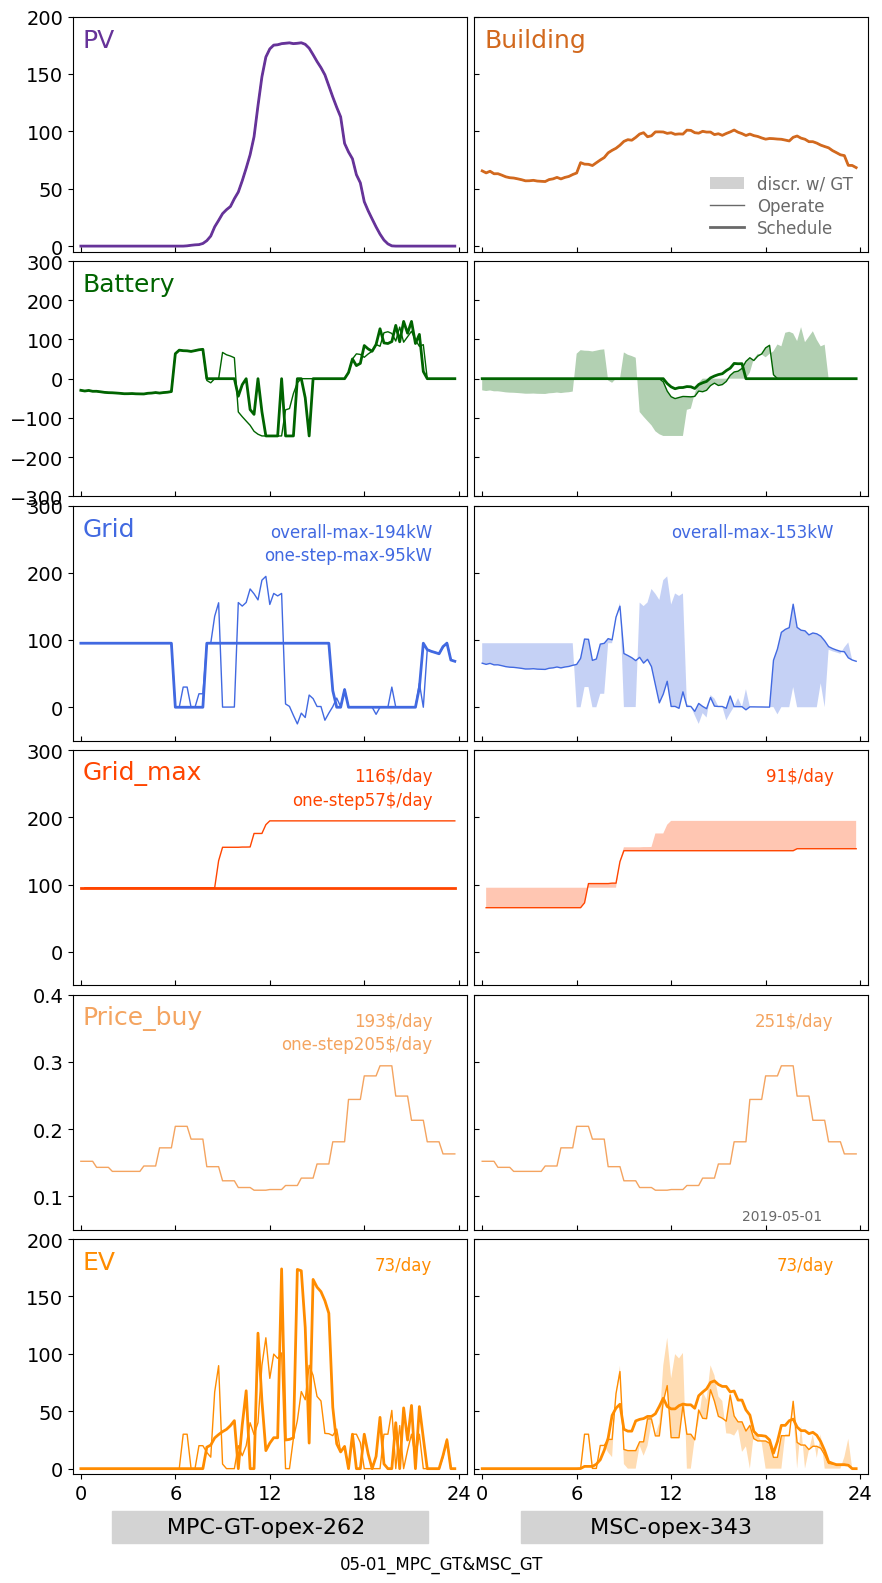

In [119]:
#May
base_=5
base=1+4*(base_-1)

mpc,_=get_trial_res(base+3,base+3)
msc,_2=get_trial_res(base,base+3)

compare_tight_old(left=mpc,base_left=_,right=msc,base_right=_2,
                  param_left="MPC-GT",param_right="MSC",keys=keys,
                  save_fn="05-01_MPC_GT&MSC_GTnew.png",gif=False,pred_t=0,
                  title="05-01_MPC_GT&MSC_GT",
                  y_lims = {
                    "bat_p": (-300,300),
                    "ev_p": (-5, 200),
                    "p_grid": (-50,300),
                    "load_pv": (-5,200),
                    "load_bld": (-5,200),
                    "tou_import":(0.05,0.4),
                    "latest_p_grid_max":(-50,300)
                },
                    start_t=datetime(2019,5,1,0,0),
                  strat_t_title='2019-05-01')

MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-6-1-0-0-6-2-0-0-Sum-GILMAN-Sum-step-0-1-2023-08-08_001.xlsx
MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-6-1-0-0-6-2-0-0-Sum-GILMAN-Sum-step-0-1-2023-08-08_001.xlsx
MPC-RBC-MSC-GT-unconscious-1.5-0.6-0.6-unif-438-unconscious-6-1-0-0-6-2-0-0-Sum-GILMAN-Sum-moving-0-1-2023-08-08_001.xlsx
MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-6-1-0-0-6-2-0-0-Sum-GILMAN-Sum-step-0-1-2023-08-08_001.xlsx
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


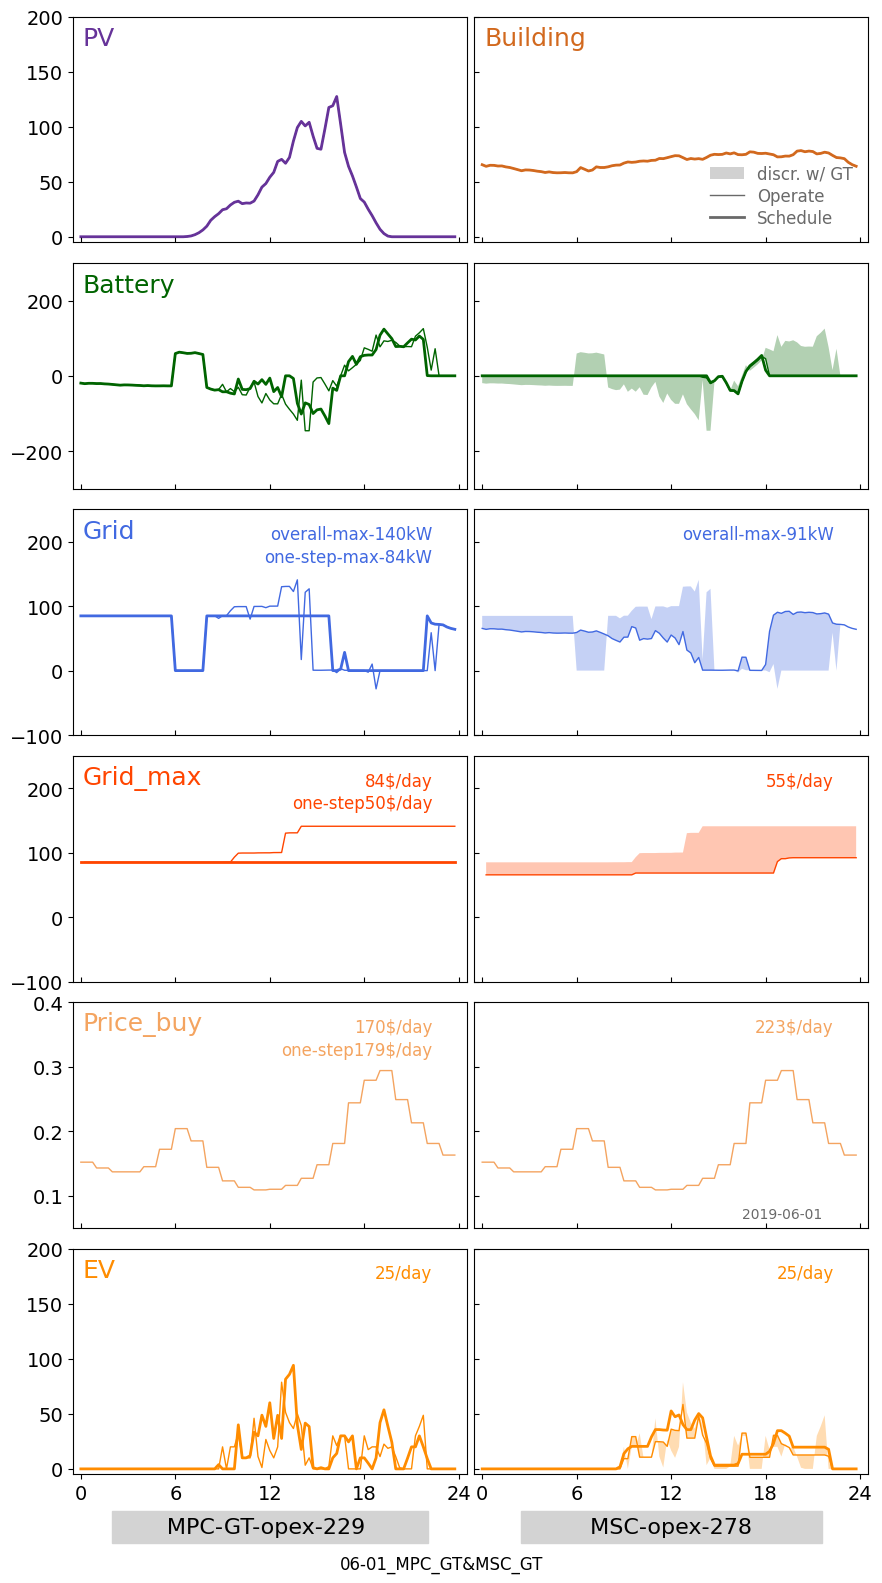

In [120]:
#jun
base_=6
base=1+4*(base_-1)

mpc,_=get_trial_res(base+3,base+3)
msc,_2=get_trial_res(base,base+3)

compare_tight_old(left=mpc,base_left=_,right=msc,base_right=_2,
                  param_left="MPC-GT",param_right="MSC",keys=keys,
                  save_fn="06-01_MPC_GT&MSC_GTnew.png",gif=False,pred_t=0,
                  title="06-01_MPC_GT&MSC_GT",
                  y_lims = {
                    "bat_p": (-300,300),
                    "ev_p": (-5, 200),
                    "p_grid": (-100,250),
                    "load_pv": (-5,200),
                    "load_bld": (-5,200),
                    "tou_import":(0.05,0.4),
                    "latest_p_grid_max":(-100,250)
                },
                    start_t=datetime(2019,6,1,0,0),
                  strat_t_title='2019-06-01')

MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-7-1-0-0-7-2-0-0-Sum-GILMAN-Sum-moving-0-1-2023-08-07_001.xlsx
MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-7-1-0-0-7-2-0-0-Sum-GILMAN-Sum-moving-0-1-2023-08-07_001.xlsx
MPC-RBC-MSC-GT-unconscious-1.5-0.6-0.6-unif-438-unconscious-7-1-0-0-7-2-0-0-Sum-GILMAN-Sum-moving-0-1-2023-08-07_001.xlsx
MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-7-1-0-0-7-2-0-0-Sum-GILMAN-Sum-moving-0-1-2023-08-07_001.xlsx


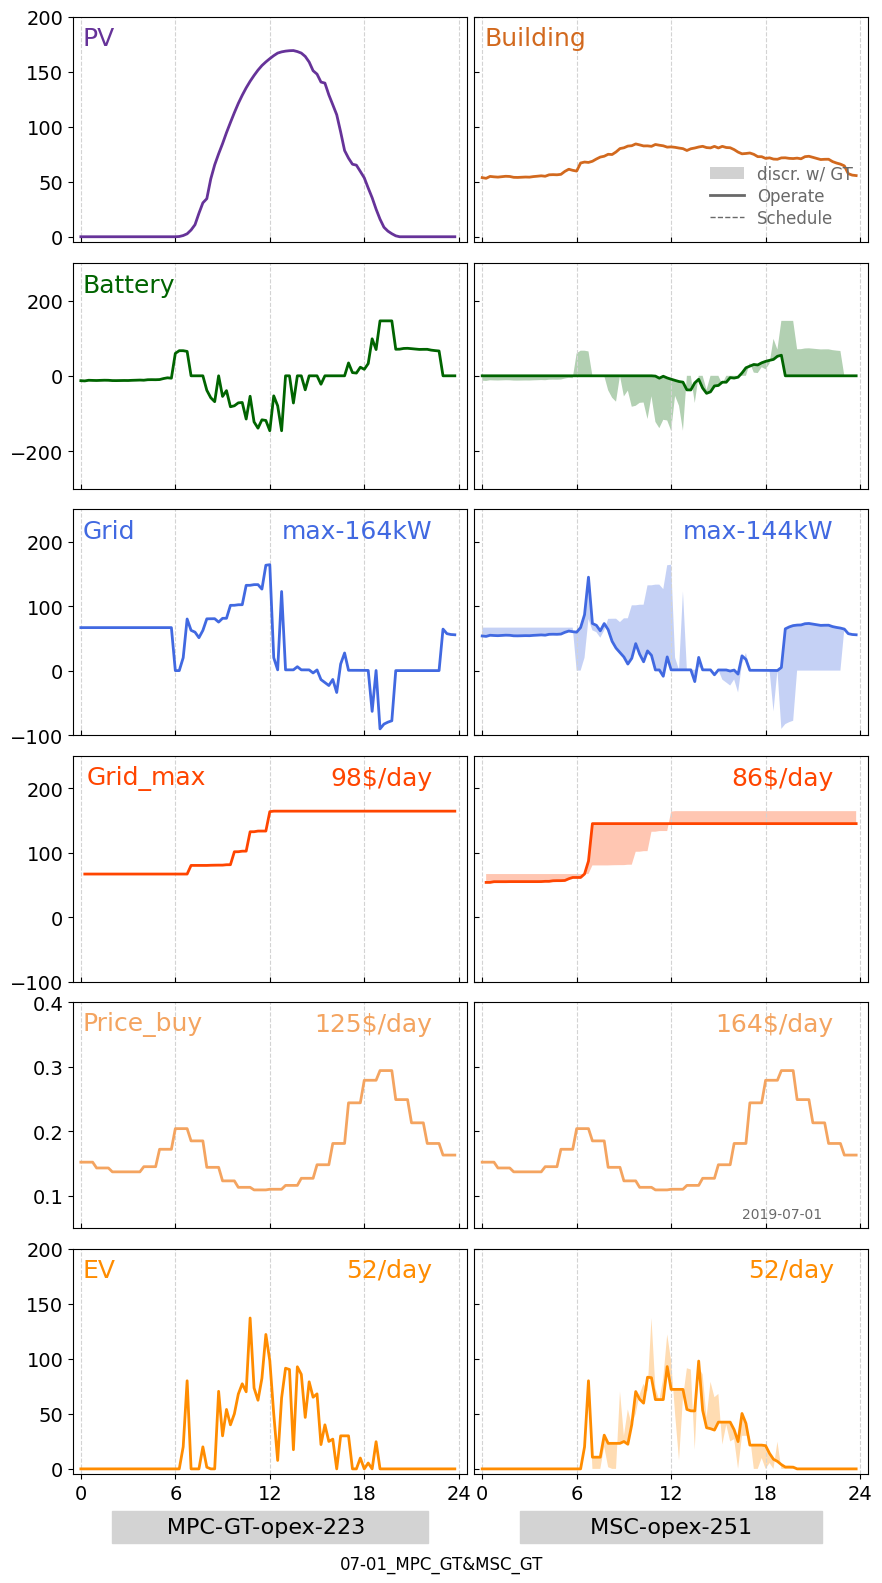

In [124]:
#jul
base_=7
base=1+4*(base_-1)

mpc,_=get_trial_res(base,base)
msc,_2=get_trial_res(base+3,base)

compare_tight_old(left=mpc,base_left=_,right=msc,base_right=_2,
                  param_left="MPC-GT",param_right="MSC",keys=keys,
                  save_fn="07-01_MPC_GT&MSC_GT.png",gif=False,pred_t=0,
                  title="07-01_MPC_GT&MSC_GT",
                  y_lims = {
                    "bat_p": (-300,300),
                    "ev_p": (-5, 200),
                    "p_grid": (-100,250),
                    "load_pv": (-5,200),
                    "load_bld": (-5,200),
                    "tou_import":(0.05,0.4),
                    "latest_p_grid_max":(-100,250)
                },
                    start_t=datetime(2019,7,1,0,0),
                  strat_t_title='2019-07-01')

# Aug

MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-8-1-0-0-8-2-0-0-Sum-GILMAN-Sum-moving-0-1-2023-08-07_001.xlsx
MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-8-1-0-0-8-2-0-0-Sum-GILMAN-Sum-moving-0-1-2023-08-07_001.xlsx
MPC-RBC-MSC-GT-unconscious-1.5-0.6-0.6-unif-438-unconscious-8-1-0-0-8-2-0-0-Sum-GILMAN-Sum-moving-0-1-2023-08-07_001.xlsx
MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-8-1-0-0-8-2-0-0-Sum-GILMAN-Sum-moving-0-1-2023-08-07_001.xlsx


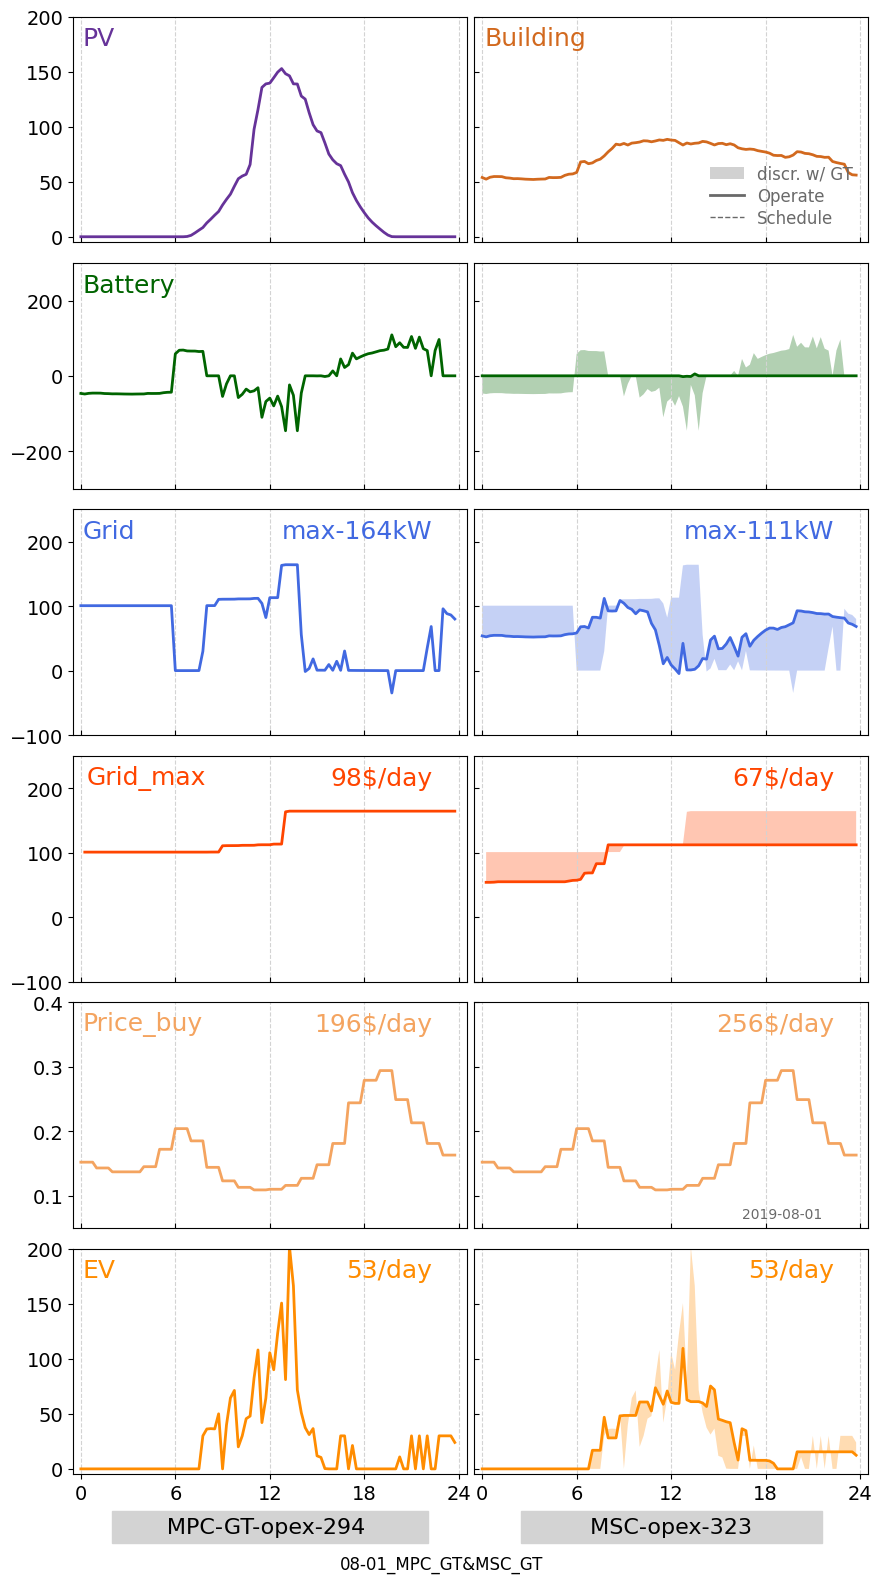

In [123]:
base_=8
base=1+4*(base_-1)

mpc,_=get_trial_res(base,base)
msc,_2=get_trial_res(base+3,base)

compare_tight_old(left=mpc,base_left=_,right=msc,base_right=_2,
                  param_left="MPC-GT",param_right="MSC",keys=keys,
                  save_fn="08-01_MPC_GT&MSC_GT.png",gif=False,pred_t=0,
                  title="08-01_MPC_GT&MSC_GT",
                  y_lims = {
                    "bat_p": (-300,300),
                    "ev_p": (-5, 200),
                    "p_grid": (-100,250),
                    "load_pv": (-5,200),
                    "load_bld": (-5,200),
                    "tou_import":(0.05,0.4),
                    "latest_p_grid_max":(-100,250)
                },
                    start_t=datetime(2019,8,1,0,0),
                  strat_t_title='2019-08-01')

MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-9-1-0-0-9-2-0-0-Sum-GILMAN-Sum-moving-0-1-2023-08-07_001.xlsx
MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-9-1-0-0-9-2-0-0-Sum-GILMAN-Sum-moving-0-1-2023-08-07_001.xlsx
MPC-RBC-MSC-GT-unconscious-1.5-0.6-0.6-unif-438-unconscious-9-1-0-0-9-2-0-0-Sum-GILMAN-Sum-moving-0-1-2023-08-07_001.xlsx
MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-9-1-0-0-9-2-0-0-Sum-GILMAN-Sum-moving-0-1-2023-08-07_001.xlsx


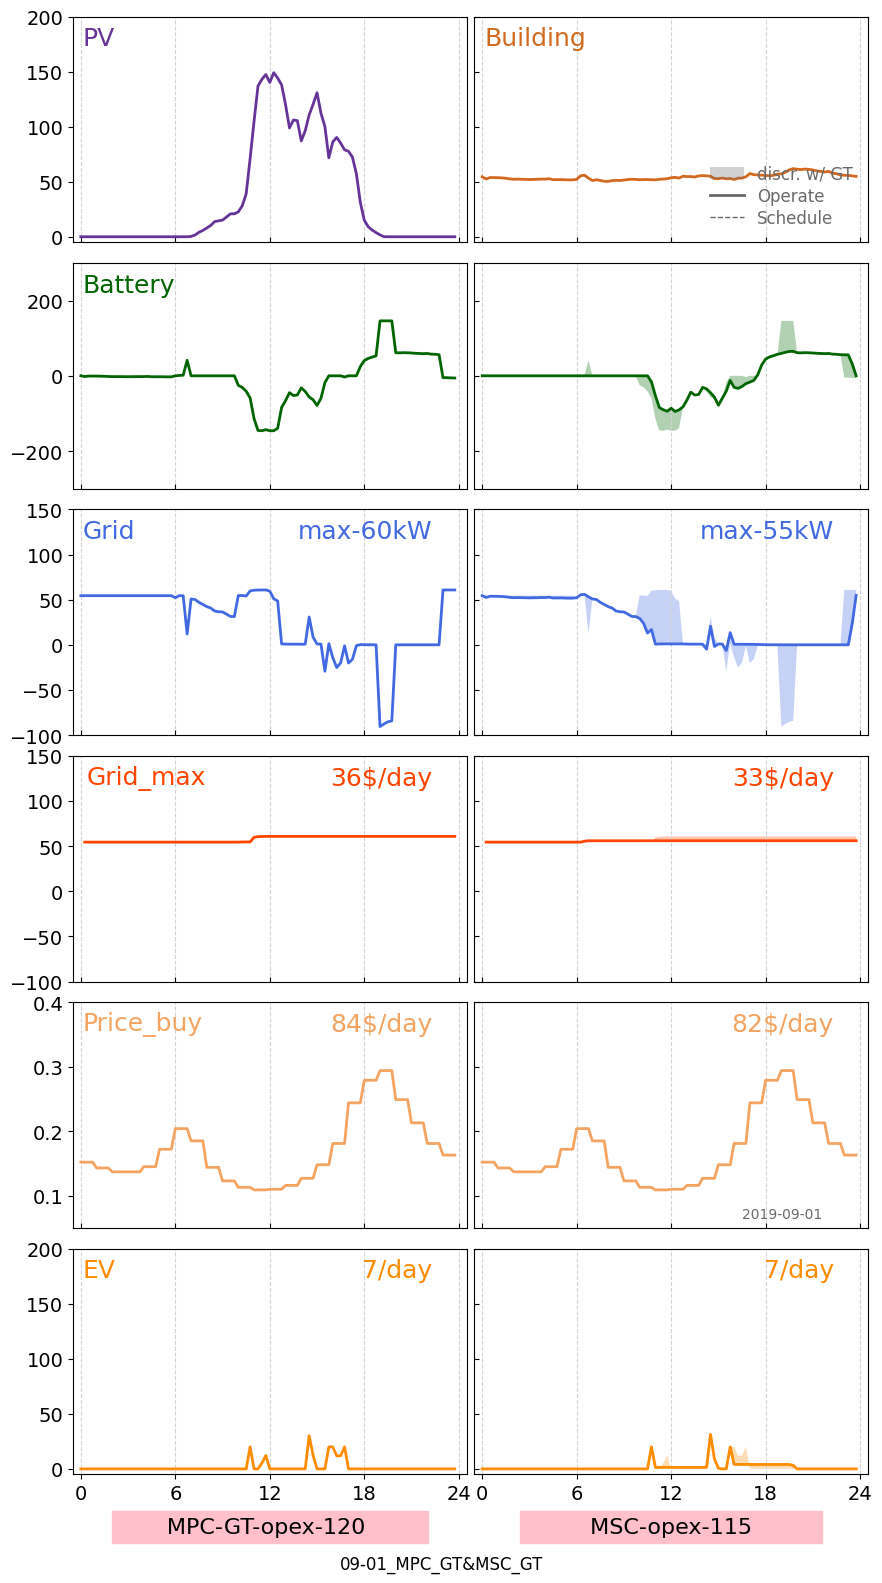

In [135]:
#Sep
base_=9
base=1+4*(base_-1)

mpc,_=get_trial_res(base,base)
msc,_2=get_trial_res(base+3,base)

compare_tight_old(left=mpc,base_left=_,right=msc,base_right=_2,
                  param_left="MPC-GT",param_right="MSC",keys=keys,
                  save_fn="09-01_MPC_GT&MSC_GT.png",gif=False,pred_t=0,
                  title="09-01_MPC_GT&MSC_GT",
                  y_lims = {
                    "bat_p": (-300,300),
                    "ev_p": (-5, 200),
                    "p_grid": (-100,150),
                    "load_pv": (-5,200),
                    "load_bld": (-5,200),
                    "tou_import":(0.05,0.4),
                    "latest_p_grid_max":(-100,150)
                },
                    start_t=datetime(2019,9,1,0,0),
                  strat_t_title='2019-09-01')

MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-10-1-0-0-10-2-0-0-Sum-GILMAN-Sum-moving-0-1-2023-08-07_001.xlsx
MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-10-1-0-0-10-2-0-0-Sum-GILMAN-Sum-moving-0-1-2023-08-07_001.xlsx
MPC-RBC-MSC-GT-unconscious-1.5-0.6-0.6-unif-438-unconscious-10-1-0-0-10-2-0-0-Sum-GILMAN-Sum-moving-0-1-2023-08-07_001.xlsx
MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-10-1-0-0-10-2-0-0-Sum-GILMAN-Sum-moving-0-1-2023-08-07_001.xlsx


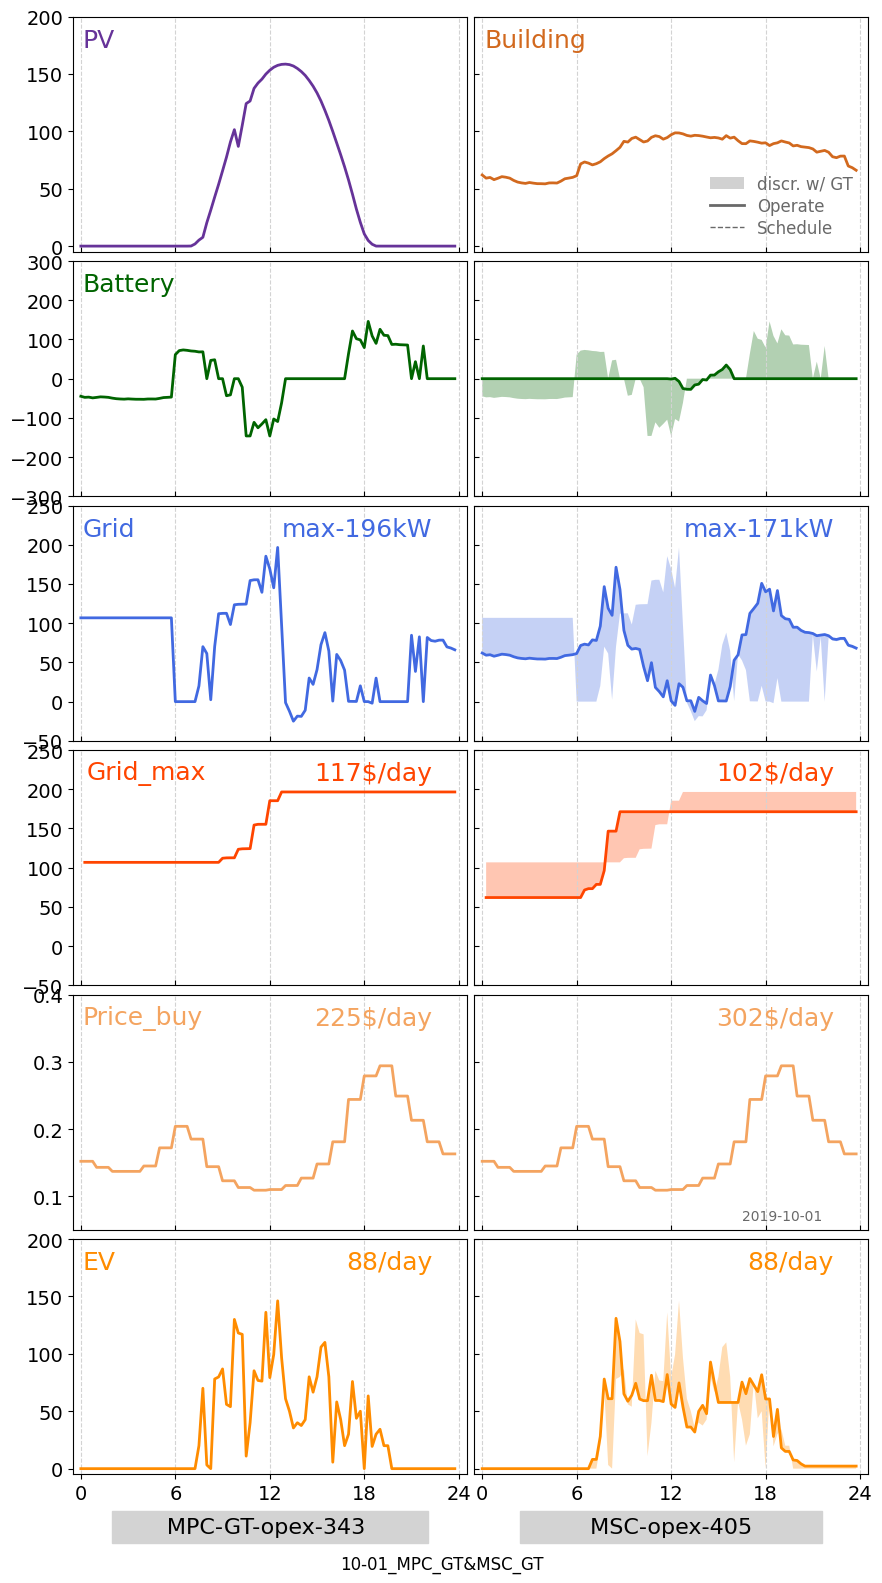

In [137]:
#Oct
base_=10
base=1+4*(base_-1)

mpc,_=get_trial_res(base,base)
msc,_2=get_trial_res(base+3,base)

compare_tight_old(left=mpc,base_left=_,right=msc,base_right=_2,
                  param_left="MPC-GT",param_right="MSC",keys=keys,
                  save_fn="10-01_MPC_GT&MSC_GT.png",gif=False,pred_t=0,
                  title="10-01_MPC_GT&MSC_GT",
                  y_lims = {
                    "bat_p": (-300,300),
                    "ev_p": (-5, 200),
                    "p_grid": (-50,250),
                    "load_pv": (-5,200),
                    "load_bld": (-5,200),
                    "tou_import":(0.05,0.4),
                    "latest_p_grid_max":(-50,250)
                },
                    start_t=datetime(2019,10,1,0,0),
                  strat_t_title='2019-10-01')

MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-11-1-0-0-11-2-0-0-Sum-GILMAN-Sum-moving-0-1-2023-08-07_001.xlsx
MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-11-1-0-0-11-2-0-0-Sum-GILMAN-Sum-moving-0-1-2023-08-07_001.xlsx
MPC-RBC-MSC-GT-unconscious-1.5-0.6-0.6-unif-438-unconscious-11-1-0-0-11-2-0-0-Sum-GILMAN-Sum-moving-0-1-2023-08-07_001.xlsx
MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-11-1-0-0-11-2-0-0-Sum-GILMAN-Sum-moving-0-1-2023-08-07_001.xlsx


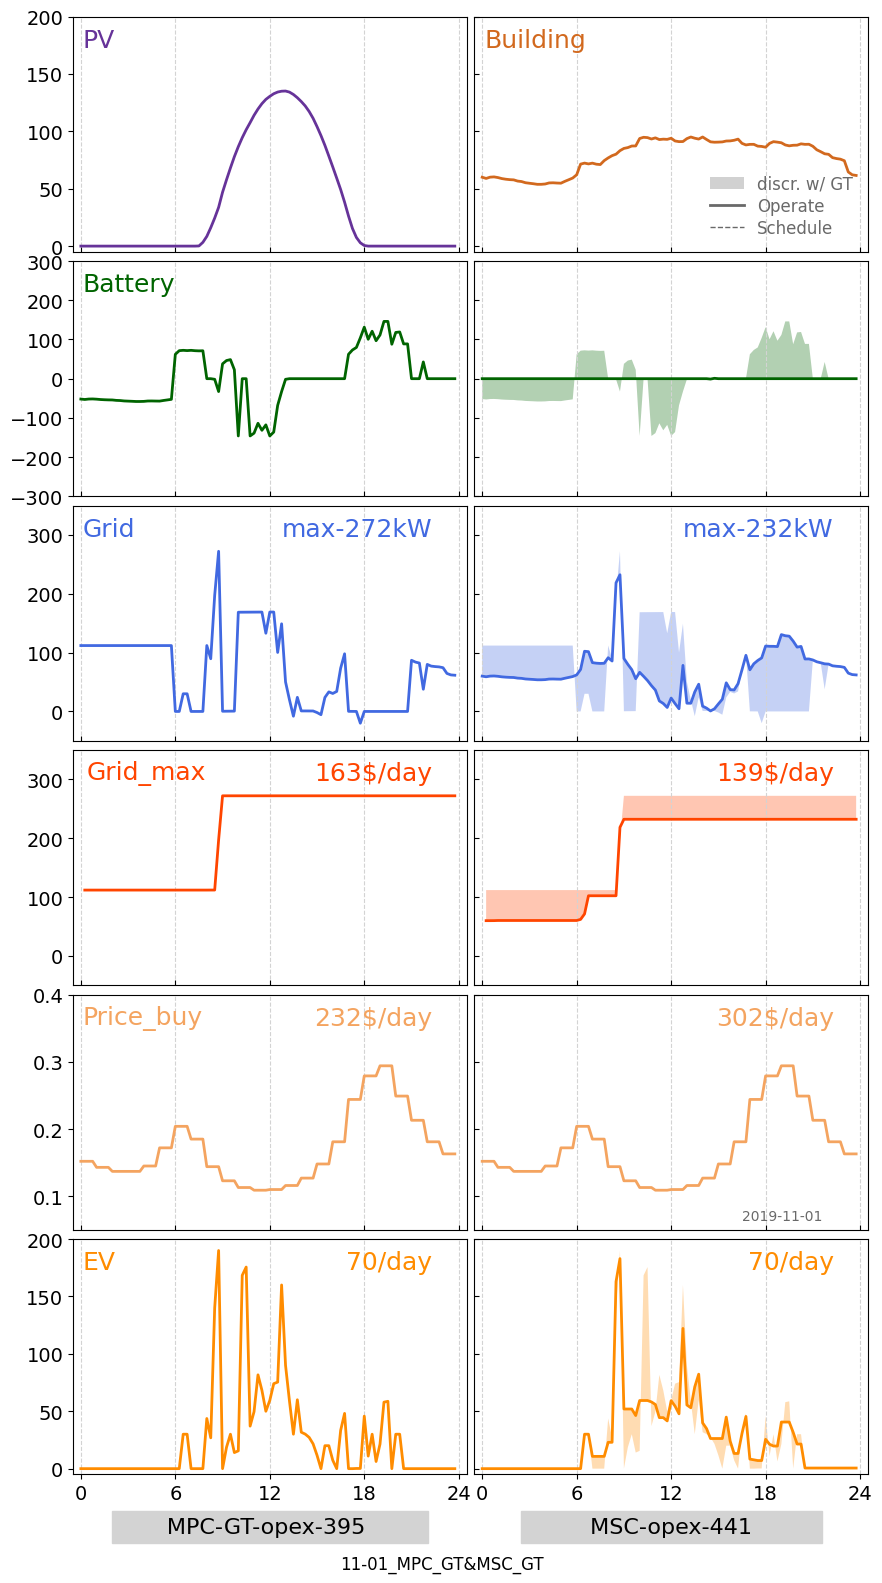

In [140]:
#Oct
base_=11
base=1+4*(base_-1)

mpc,_=get_trial_res(base,base)
msc,_2=get_trial_res(base+3,base)

compare_tight_old(left=mpc,base_left=_,right=msc,base_right=_2,
                  param_left="MPC-GT",param_right="MSC",keys=keys,
                  save_fn="11-01_MPC_GT&MSC_GT.png",gif=False,pred_t=0,
                  title="11-01_MPC_GT&MSC_GT",
                  y_lims = {
                    "bat_p": (-300,300),
                    "ev_p": (-5, 200),
                    "p_grid": (-50,350),
                    "load_pv": (-5,200),
                    "load_bld": (-5,200),
                    "tou_import":(0.05,0.4),
                    "latest_p_grid_max":(-50,350)
                },
                    start_t=datetime(2019,11,1,0,0),
                  strat_t_title='2019-11-01')

MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-12-1-0-0-12-2-0-0-Sum-GILMAN-Sum-moving-0-1-2023-08-07_001.xlsx
MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-12-1-0-0-12-2-0-0-Sum-GILMAN-Sum-moving-0-1-2023-08-07_001.xlsx
MPC-RBC-MSC-GT-unconscious-1.5-0.6-0.6-unif-438-unconscious-12-1-0-0-12-2-0-0-Sum-GILMAN-Sum-moving-0-1-2023-08-07_001.xlsx
MPC-MPC-optimal-GT-unconscious-1.5-0.6-0.6-flex-438-unconscious-12-1-0-0-12-2-0-0-Sum-GILMAN-Sum-moving-0-1-2023-08-07_001.xlsx


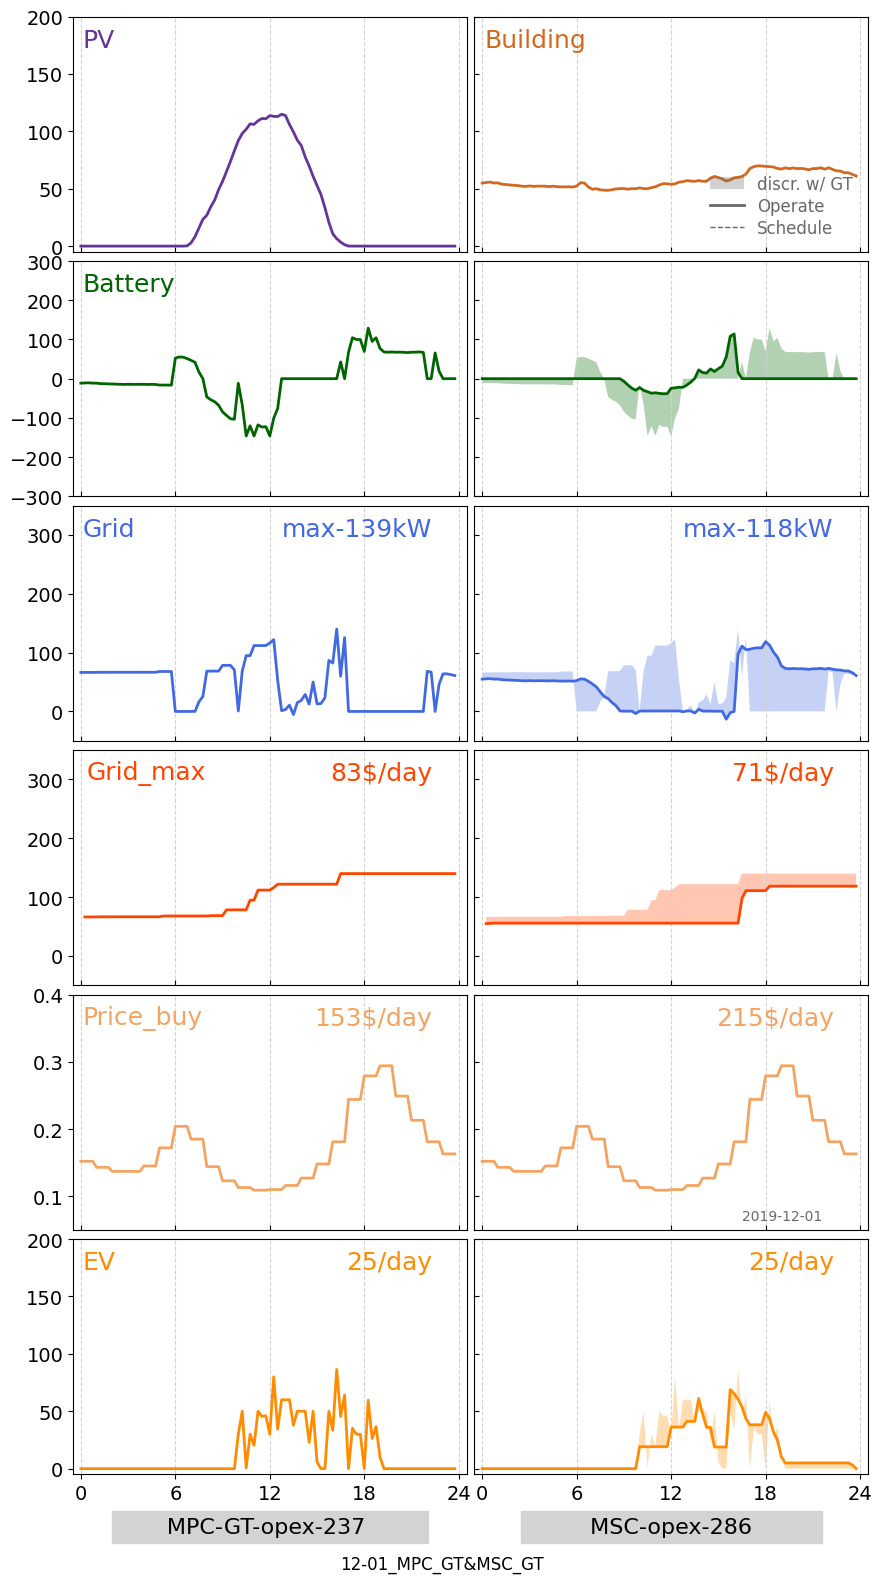

In [141]:
#Dec
base_=12
base=1+4*(base_-1)

mpc,_=get_trial_res(base,base)
msc,_2=get_trial_res(base+3,base)

compare_tight_old(left=mpc,base_left=_,right=msc,base_right=_2,
                  param_left="MPC-GT",param_right="MSC",keys=keys,
                  save_fn="12-01_MPC_GT&MSC_GT.png",gif=False,pred_t=0,
                  title="12-01_MPC_GT&MSC_GT",
                  y_lims = {
                    "bat_p": (-300,300),
                    "ev_p": (-5, 200),
                    "p_grid": (-50,350),
                    "load_pv": (-5,200),
                    "load_bld": (-5,200),
                    "tou_import":(0.05,0.4),
                    "latest_p_grid_max":(-50,350)
                },
                    start_t=datetime(2019,12,1,0,0),
                  strat_t_title='2019-12-01')

In [83]:
mpc['summary']#.loc["OPEX"]["All"]

,unit,All
days,1,0.989583
TCO,$/day,400.453046
TCO_est,$/day,400.453046
OPEX,$/day,382.453046
CAPEX,$/day,18.000000
CAPEX_est,$/day,18.000000
bat_capacity,kWh,438.000000
eq_bat_capacity,hr,5.224185
eq_cycles,1/day,0.000000
eq_cycles_est,1/day,0.000000


In [ ]:
'''base=48
mpc_simple, mpc_gt=get_trial_res(1+base,3+base)
mpc_prediction, mpc_gt=get_trial_res(2+base,3+base)'''

#mpc_simple, mpc_gt=get_trial_res(63,61)
msc, mpc_gt_=get_trial_res(65,61)
mpc_gt,_=get_trial_res(61,61)

compare_tight_old(left=mpc_gt,base_left=_,right=msc,base_right=_,
                  param_left="MPC-GT",param_right="MSC",keys=keys,
                  save_fn="0729_MPC_Simple&XGB-bat9h-JAN.png",gif=False,pred_t=0,
                  title="0729_MPC_Simple&XGB-bat_9h-JAN",
                  y_lims = {
                    "bat_p": (-300,300),
                    "ev_p": (-5, 200),
                    "p_grid": (-300,300),
                    "load_pv": (-5,200),
                    "load_bld": (-5,200),
                },
                    start_t=datetime(2019,3,25,0,0),
                  strat_t_title='week13-2019')

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


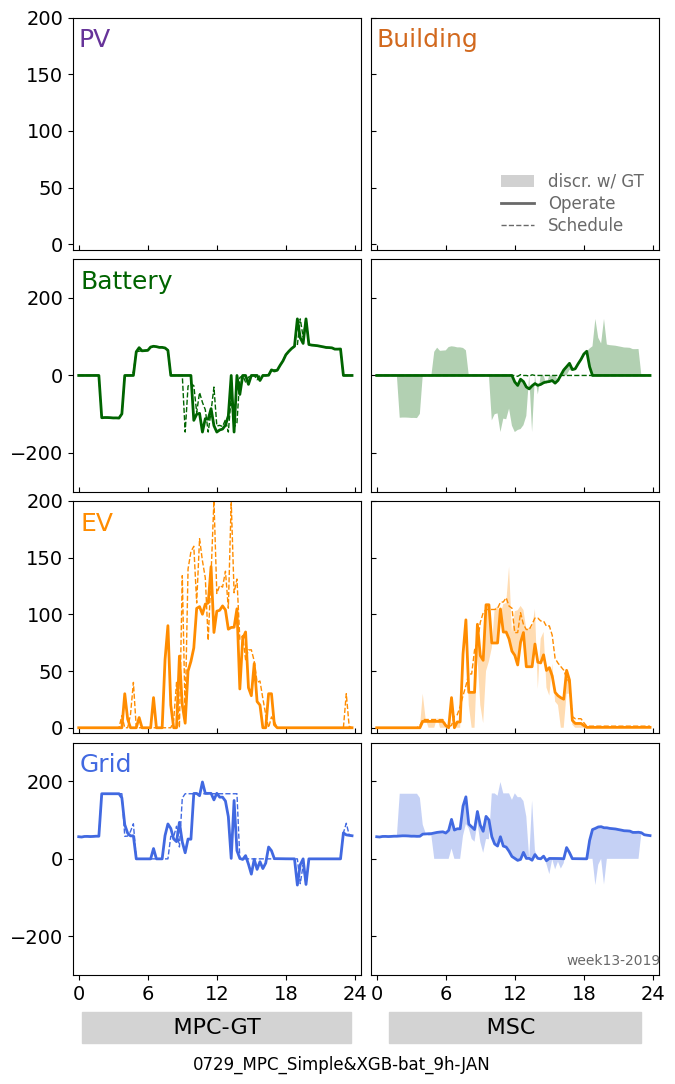

In [24]:
'''base=48
mpc_simple, mpc_gt=get_trial_res(1+base,3+base)
mpc_prediction, mpc_gt=get_trial_res(2+base,3+base)'''

#mpc_simple, mpc_gt=get_trial_res(63,61)
msc, mpc_gt_=get_trial_res(65,61)
mpc_gt,_=get_trial_res(61,61)

compare_tight_old(left=mpc_gt,base_left=_,right=msc,base_right=_,
                  param_left="MPC-GT",param_right="MSC",keys=keys,
                  save_fn="0729_MPC_Simple&XGB-bat9h-JAN.png",gif=False,pred_t=0,
                  title="0729_MPC_Simple&XGB-bat_9h-JAN",
                  y_lims = {
                    "bat_p": (-300,300),
                    "ev_p": (-5, 200),
                    "p_grid": (-300,300),
                    "load_pv": (-5,200),
                    "load_bld": (-5,200),
                },
                    start_t=datetime(2019,3,25,0,0),
                  strat_t_title='week13-2019')

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


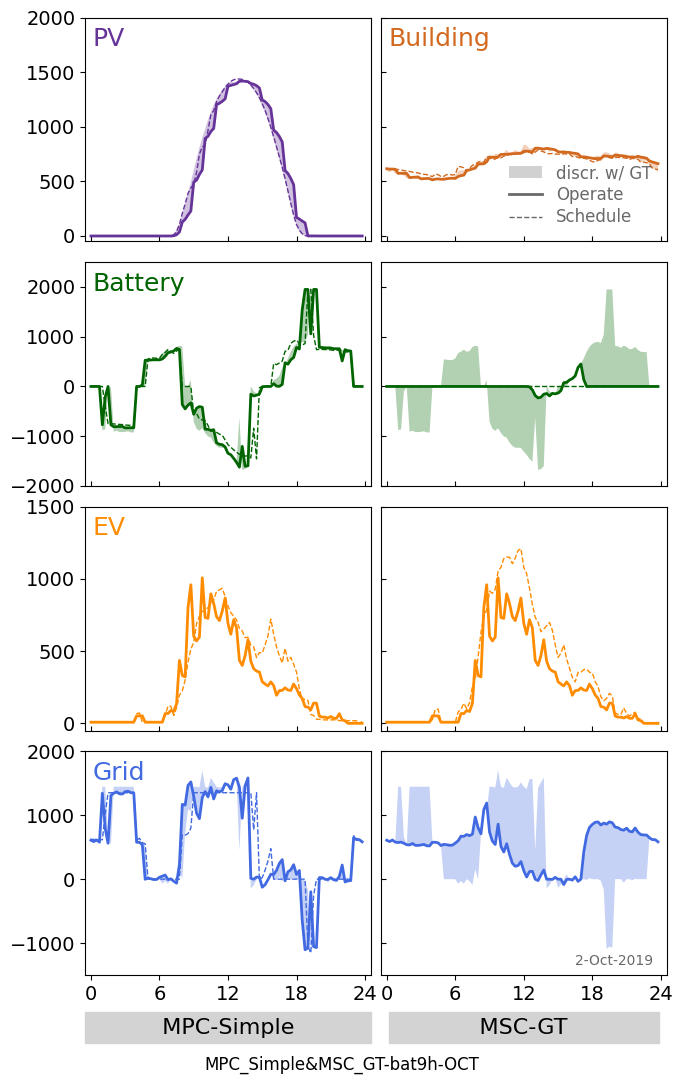

In [52]:
mpc_simple, mpc_gt=get_trial_res(1,3)
msc_gt, mpc_gt=get_trial_res(4,3)

compare_tight_old(left=mpc_simple,base_left=mpc_gt,right=msc_gt,base_right=mpc_gt,
                  param_left="MPC-Simple",param_right="MSC-GT",keys=keys,
                  save_fn="MPC_Simple&MSC_GT-bat9h-OCT.png",gif=False,pred_t=0,
                  title="MPC_Simple&MSC_GT-bat9h-OCT",
                  y_lims = {
                    "bat_p": (-2000,2500),
                    "ev_p": (-50, 1500),
                    "p_grid": (-1500,2000),
                    "load_pv": (-50,2000),
                    "load_bld": (-50,2000),
                },
                    start_t=datetime(2019,10,2,0,0),
                  strat_t_title='2-Oct-2019')

# Jan

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


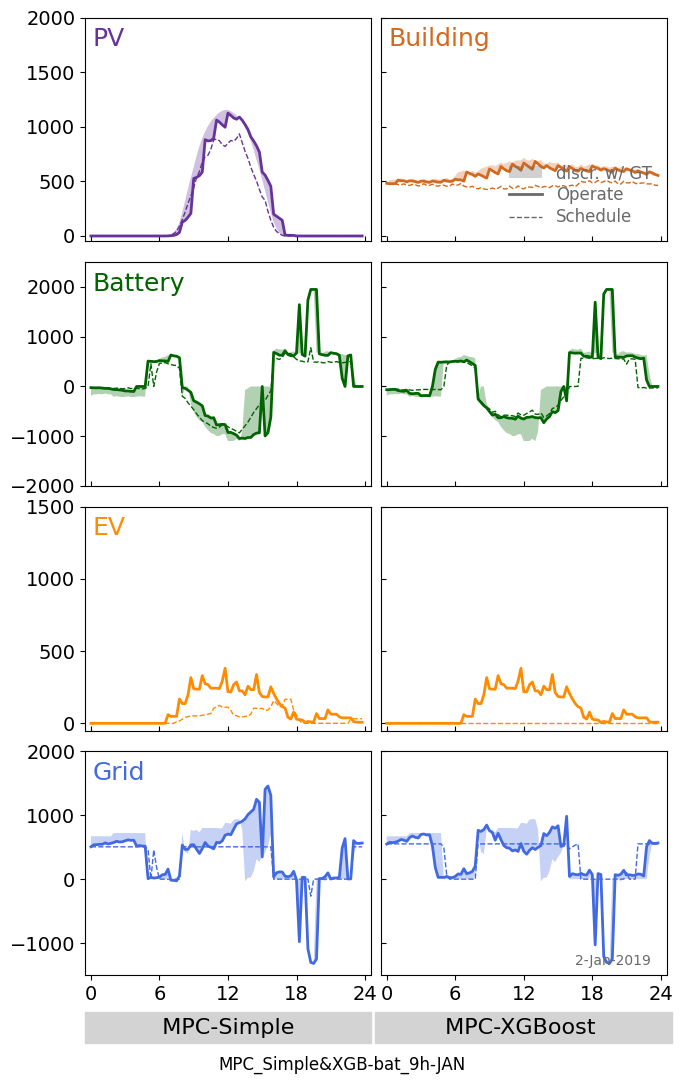

In [53]:
mpc_simple, mpc_gt=get_trial_res(5,7)
mpc_prediction, mpc_gt=get_trial_res(6,7)

compare_tight_old(left=mpc_simple,base_left=mpc_gt,right=mpc_prediction,base_right=mpc_gt,
                  param_left="MPC-Simple",param_right="MPC-XGBoost",keys=keys,
                  save_fn="MPC_Simple&XGB-bat9h-JAN.png",gif=False,pred_t=0,
                  title="MPC_Simple&XGB-bat_9h-JAN",
                  y_lims = {
                    "bat_p": (-2000,2500),
                    "ev_p": (-50, 1500),
                    "p_grid": (-1500,2000),
                    "load_pv": (-50,2000),
                    "load_bld": (-50,2000),
                },
                    start_t=datetime(2019,1,2,0,0),
                  strat_t_title='2-Jan-2019')

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


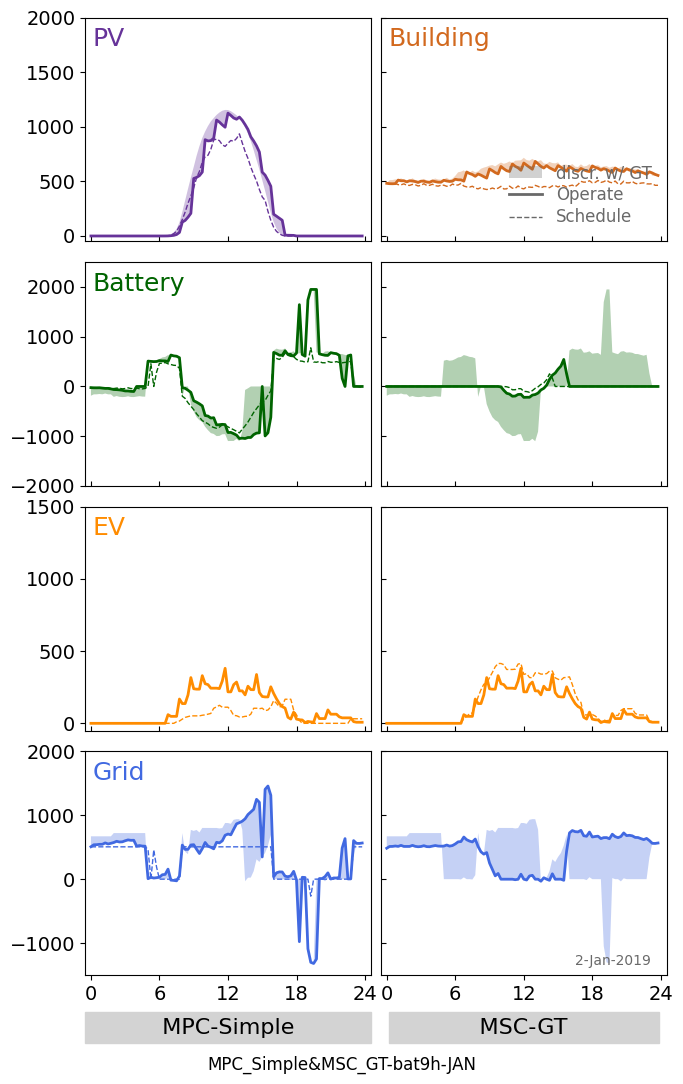

In [54]:
mpc_simple, mpc_gt=get_trial_res(5,7)
msc_gt, mpc_gt=get_trial_res(8,7)

compare_tight_old(left=mpc_simple,base_left=mpc_gt,right=msc_gt,base_right=mpc_gt,
                  param_left="MPC-Simple",param_right="MSC-GT",keys=keys,
                  save_fn="MPC_Simple&MSC_GT-bat9h-JAN.png",gif=False,pred_t=0,
                  title="MPC_Simple&MSC_GT-bat9h-JAN",
                  y_lims = {
                    "bat_p": (-2000,2500),
                    "ev_p": (-50, 1500),
                    "p_grid": (-1500,2000),
                    "load_pv": (-50,2000),
                    "load_bld": (-50,2000),
                },
                    start_t=datetime(2019,1,2,0,0),
                  strat_t_title='2-Jan-2019')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 创建示例数据
data = {'group1': [2.5, 3.5], 'group2': [1.8, 2.7], 'group3': [4.1, 5.3]}
df = pd.DataFrame(data)

# 计算每组数据的总和
total = df.sum(axis=1)

# 计算每组数据中每个值的相对占比
df = df.divide(total, axis=0)

# 创建一个包含三个子图的画布
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# 在每个子图中绘制条形图
df['group1'].plot(kind='bar', ax=axes[0], colormap='Paired', width=0.8)
df['group2'].plot(kind='bar', ax=axes[1], colormap='Pastel2', width=0.8)
df['group3'].plot(kind='bar', ax=axes[2], colormap='Set2', width=0.8)

# 设置标题和标签
axes[0].set_title('Group 1')
axes[1].set_title('Group 2')
axes[2].set_title('Group 3')
plt.tight_layout()
plt.show()


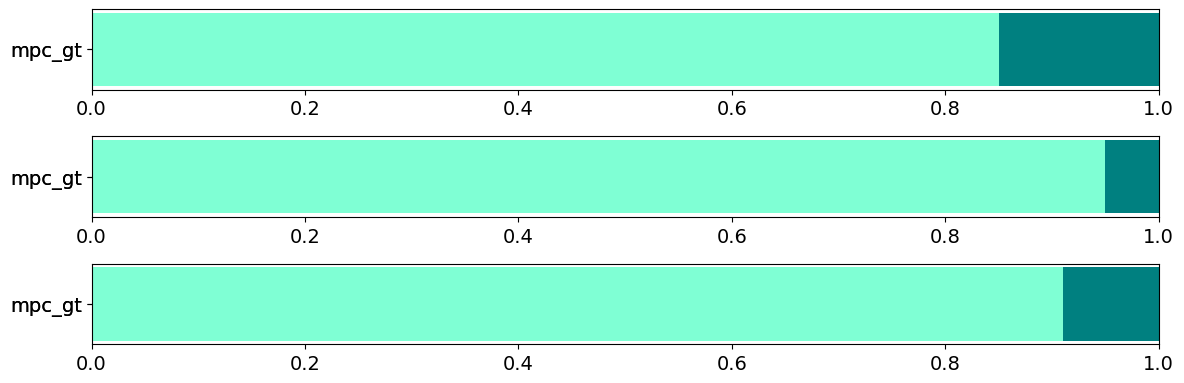

In [ ]:
import matplotlib.pyplot as plt
 
# 数据
data = [{'mpc_nn': 1, 'mpc_gt': 0.85},
        {'mpc_nn': 1, 'mpc_gt': 0.95},
        {'mpc_nn': 1, 'mpc_gt': 0.91}]
 
# 计算最大值
max_val = max([max(d['mpc_nn'], d['mpc_gt']) for d in data])
 
# 创建3个横向条形图
fig, axs = plt.subplots(3, 1, figsize=(12, 4))

# 绘制每个图
for i in range(0, 3):
    mpc_nn = data[i]['mpc_nn']
    mpc_gt = data[i]['mpc_gt']
    
    y_pos = [0, 0]
    axs[i].barh(y_pos, [mpc_nn, mpc_gt], height=0.2, color=['teal', 'aquamarine'])
    axs[i].set_yticks(y_pos)
    axs[i].set_yticklabels(['mpc_nn', 'mpc_gt'])
    axs[i].set_xlim([0, max_val])
    #axs[i].set_xlabel('Value')

# 调整子图间的间距
fig.tight_layout()

# 显示图形
plt.show()


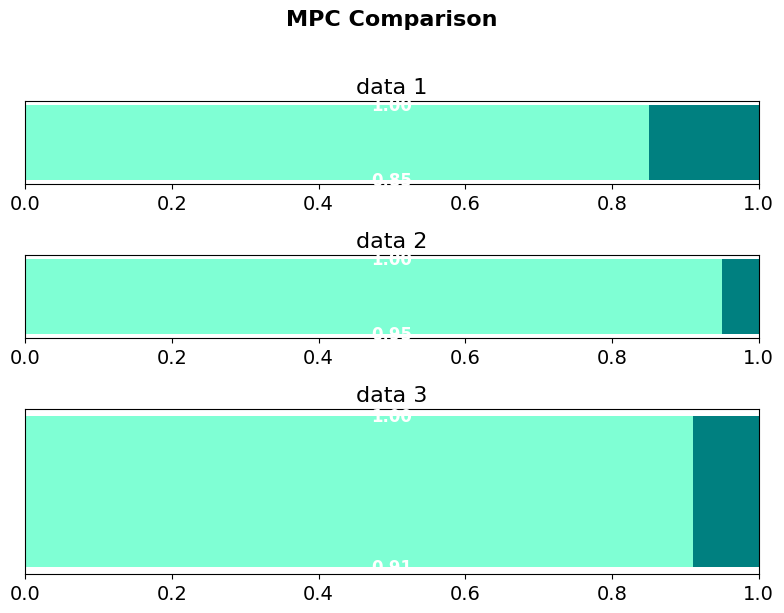

In [ ]:
import matplotlib.pyplot as plt
 
# 数据
data = [{'mpc_nn': 1, 'mpc_gt': 0.85},
        {'mpc_nn': 1, 'mpc_gt': 0.95},
        {'mpc_nn': 1, 'mpc_gt': 0.91}]
 
# 计算最大值
max_val = max([max(d['mpc_nn'], d['mpc_gt']) for d in data])
 
# 创建3个横向条形图
fig, axs = plt.subplots(3, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [0.5, 0.5, 1]})

# 绘制每个图
for i in range(0, 3):
    mpc_nn = data[i]['mpc_nn']
    mpc_gt = data[i]['mpc_gt']
    
    y_pos = [0, 0]
    axs[i].barh(y_pos, [mpc_nn, mpc_gt], height=0.2, color=['teal', 'aquamarine'])
    axs[i].set_yticks([])
    axs[i].set_xlim([0, max_val])
    axs[i].set_title(f'data {i + 1}')
    
    # 在条形图中间添加标题
    axs[i].text(max_val/2, y_pos[1]+0.1, f'{mpc_nn:.2f}', ha='center', va='center', color='white', fontsize=12, fontweight='bold')
    axs[i].text(max_val/2, y_pos[0]-0.1, f'{mpc_gt:.2f}', ha='center', va='center', color='white', fontsize=12, fontweight='bold')
    
# 在整个图形上方添加主标题
fig.suptitle('MPC Comparison', fontsize=16, fontweight='bold', y=1.02)

# 调整子图间的间距
fig.tight_layout()

# 显示图形
plt.show()


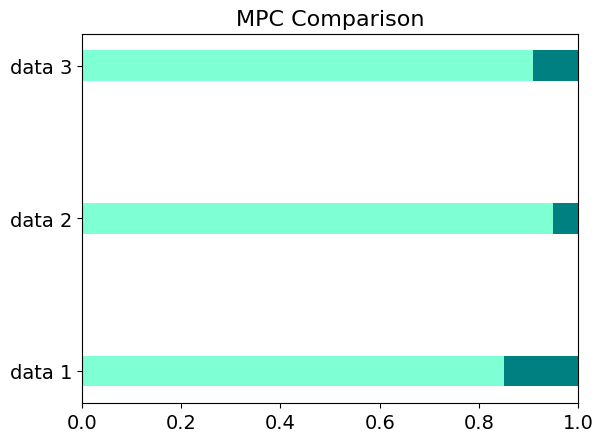

In [ ]:
import matplotlib.pyplot as plt
# 数据
data = [{'mpc_nn': 1, 'mpc_gt': 0.85},
        {'mpc_nn': 1, 'mpc_gt': 0.95},
        {'mpc_nn': 1, 'mpc_gt': 0.91}]
# 计算最大值
max_val = max([max(d['mpc_nn'], d['mpc_gt']) for d in data])
# 绘制条形图
ax = plt.subplot(1, 1, 1)
for i, d in enumerate(data):
    mpc_nn = d['mpc_nn']
    mpc_gt = d['mpc_gt']
    
    y_pos = [i, i]
    ax.barh(y_pos, [mpc_nn, mpc_gt], height=0.2, color=['teal', 'aquamarine'])
    ax.set_yticks(range(len(data)))
    ax.set_yticklabels([f'data {i + 1}' for i in range(len(data))])
    ax.set_xlim([0, max_val])
    #ax.set_title('MPC Comparison')
    
    # 在条形图中间添加标题
    #ax.text(max_val/2, y_pos[1]+0.1, f'{mpc_nn:.2f}', ha='center', va='center', color='white', fontsize=12, fontweight='bold')
    #ax.text(max_val/2, y_pos[0]-0.1, f'{mpc_gt:.2f}', ha='center', va='center', color='white', fontsize=12, fontweight='bold')
plt.show()